In [1]:
'''
    Run this notebook for creating all models
    
'''
%load_ext autoreload

import os
import sys
sys.path.append("../..")  #Path to data directory
import pandas as pd
import collections
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.impute import SimpleImputer

from sklearn.utils import resample
# from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Added below imports to disable some warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from src.data_prep_Copy1 import *
from src.data_constants import *

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# House Keeping

In [2]:
# Python library yellowbrick is used for multi-class visualization
#pip install yellowbrick
#pip install lightgbm or conda install lightgbm
# https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

# Business Understanding
Botnet-powered distributed denial of service (DDoS) attacks have used infected IoT devices to bring down websites. IoT devices can also be used to direct other attacks. For instance, there may be future attempts to weaponize IoT devices. A possible example would be a nation shutting down home thermostats in an enemy state during a harsh winter.

In response, network intrusion detection systems have been developed to detect suspicious network activity. Routers are trained to identify cyber threats.

This project will predict  Machine Learning models to detect Botnet attacks on IoT devices

Datasets available in UCI.
https://archive.ics.uci.edu/ml/datasets/detection_of_IoT_botnet_attacks_N_BaIoT#
https://archive.ics.uci.edu/ml/machine-learning-databases/00442/


## Devices list
Dataset from UCI were collected from 9 IoT Devices in 3 categories listed below.
For each device, data is organized under type of attack (Benign, Mirai, Bashlite). 
Benign traffic is normal traffic which are not attacked by botnet malware.
Mirai and Bashlite are two types of malware attacking these iot devices.
For the putpose of this project, the botnet name Gyfgyt and Bashlite are used interchangeably. 
For each device the following data is collcted.
- 1) Benign data
- 2) Mirai Malware Threat
- 3) Gyfgyt Malware Threat

In [3]:
# List of all IoT devices for which data was collcted
device_list = list_iot_devices()

_______________   ________________________________________  ______                                                      
Decice Category   Device                                    Number                                                      
_______________   ________________________________________  ______                                                      
Door_Bell         Damini_Doorbell                           1                                                           
Door_Bell         Ennino_Doorbell                           2                                                           
Thermostats       Ecobee_Thermostat                         1                                                           
Baby_Monitor      Philips_B120N10_Baby_Monitor              1                                                           
Security_Camera   Provision_PT_737E_Security_Camera         1                                                           
Security_Camera   Provision_PT_8

## Running Models 
> Because of large datasets, I will read all data files once in a class instance and **pickle** the dataset to avoid reading several times.

> For each device I will run number of models to predict malware attacks.

> As a first step, run models for one devic **Damini Doorbell**

> Following models are run for comparision
> 1. DummyClassifier (Typically favors majority of the class)
> 2. Logistic Regression - FSM (Use all data - no train/test split and use defaults)
> 3. Logistic Regression       (30% test data is held. Remaining 70% data is split to train and validation)
> 4. KNeighborsClassifie       (    ,,   )
> 5. RandomForestClassifier    ( ,, ) -> Computationally expensive, so not running it all the time.
> 6. XGBClassifier             (,, )

### Model Evaluation
> A malware attack is consequential to the network and cyber security threat to consumers and business alike. <BR>
> I will use **Recall** as the primary method to evaluate the model to reduce Type-II error. Also, overall **Accuracy** is considered

## For each device we will run number of models to predict malware attacks.

## 1) Device: Damini_Doorbell

 
> Instantiate class IoT_Device.<BR>
>>1) Call ** read_device_pickle** to deserialize iot class object if a pickle file exis and revive the class instance to iot<BR>
>>2) If no pickle file exisits, instantiate an object by calling **IoT_Device** and write it to a new **pickle** file

In [4]:
# Read the pickle file or intantiate IoT_Device
damini_iot = read_device_pickle(DAMINI_DOORBELL)    
if damini_iot == None:
    # Instantiate class IoT_Device
    damini_iot = IoT_Device(DAMINI_DOORBELL)
    
    #Pickle the object
    write_device_pickle(damini_iot, DAMINI_DOORBELL)

../../data_prep/Damini_Doorbell.pkl
Ready to pickle the device ..  Shape: 148644


### Model 0: Dummmy Model
> Dummy model will most likely favor the majority class

              precision    recall  f1-score   support

           0      0.332     0.331     0.332     49548
           1      0.336     0.338     0.337     49548
           2      0.335     0.334     0.335     49548

    accuracy                          0.334    148644
   macro avg      0.334     0.334     0.334    148644
weighted avg      0.334     0.334     0.334    148644


 [0] Dummy Model: Raw Input Data--cross_val_score- [0.33469003 0.32991355 0.33304181 0.33421911 0.3333894 ]

***** [Damini_Doorbell] [Test Data] DummyClassifier *****

              precision    recall  f1-score   support

           0      0.332     0.331     0.332     49548
           1      0.336     0.338     0.337     49548
           2      0.335     0.334     0.335     49548

    accuracy                          0.334    148644
   macro avg      0.334     0.334     0.334    148644
weighted avg      0.334     0.334     0.334    148644



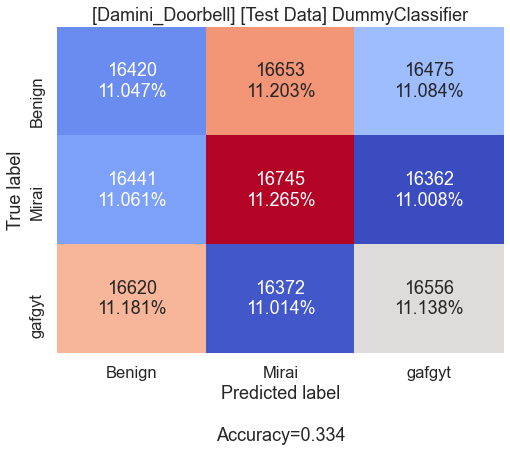

In [5]:
damini_iot.iot_Model("DummyClassifier")

> Model pretty much pickedup all the values in the respective classes as benign traffic <BR>
> Now lets run a LogisticRegression with pretty much

### Model 1: FSM LogisticRegression
> Now lets run a LogisticRegression model with pretty much all defaults with out split

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     49548
           1      0.333     1.000     0.500     49548
           2      0.000     0.000     0.000     49548

    accuracy                          0.333    148644
   macro avg      0.111     0.333     0.167    148644
weighted avg      0.111     0.333     0.167    148644


***** [Damini_Doorbell] [Test Data] FSM-LogisticRegression *****

              precision    recall  f1-score   support

           0      0.000     0.000     0.000     49548
           1      0.333     1.000     0.500     49548
           2      0.000     0.000     0.000     49548

    accuracy                          0.333    148644
   macro avg      0.111     0.333     0.167    148644
weighted avg      0.111     0.333     0.167    148644



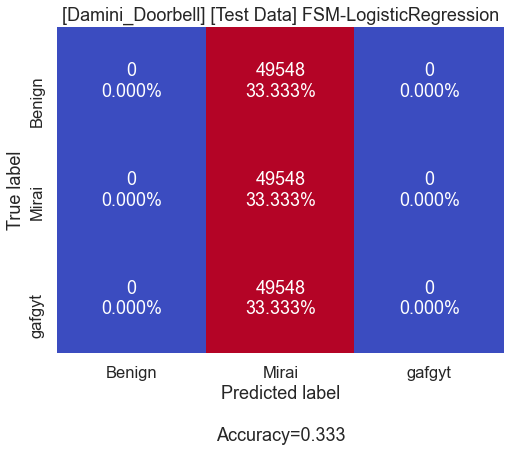


 [0] FSM Model: Raw Input Data--cross_val_score- [0.67903394 0.70035992 0.69161425 0.57549867 0.4383746 ]


In [6]:
# Run plain vanila FSM LogisticRegression model with all default inpts - binary target
damini_iot.iot_Model("FSM")

### First Simple accuracy is low, though it appears recall score is 0.
> Prediction on benign traffic is low<BR>
> Even much lower or no Mirai atacks were identified<BR>
> More traffic was identified as infected with Gafgyt malware, which is incorrect.
    
> The traffic measurements for each of those devices will need scaling before we pick-up the right signals from the data.

## Model2: LogisticRegression -- Target = binary; Benign(=0), Mirai(=1), Gafgyt(=2)

- 1) Train-Test-Split with 30% test data
- 2) Scale the predictor dataset 
- 3) Fit LogisticRegression model with mostly default values and run cross_validation_score, confustion_matrix for train and test data.


***** [Damini_Doorbell] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.609     1.000     0.757     24099
           1      0.999     0.999     0.999     24293
           2      0.999     0.367     0.537     24443

    accuracy                          0.787     72835
   macro avg      0.869     0.789     0.764     72835
weighted avg      0.870     0.787     0.764     72835



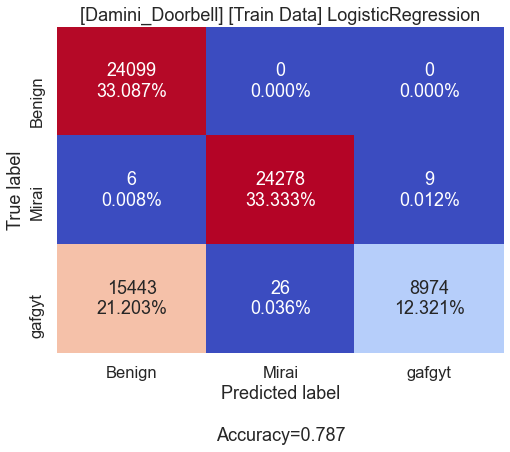


***** [Damini_Doorbell] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.620     1.000     0.766     10551
           1      0.999     1.000     0.999     10398
           2      0.999     0.370     0.540     10266

    accuracy                          0.793     31215
   macro avg      0.873     0.790     0.768     31215
weighted avg      0.871     0.793     0.769     31215



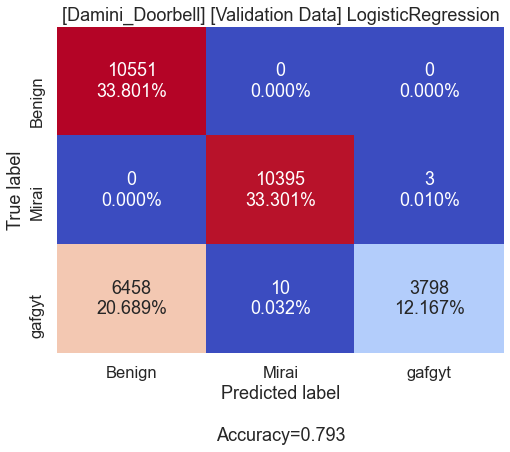


***** [Damini_Doorbell] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.615     1.000     0.761     14898
           1      0.999     0.999     0.999     14857
           2      0.998     0.370     0.539     14839

    accuracy                          0.790     44594
   macro avg      0.871     0.790     0.767     44594
weighted avg      0.870     0.790     0.767     44594



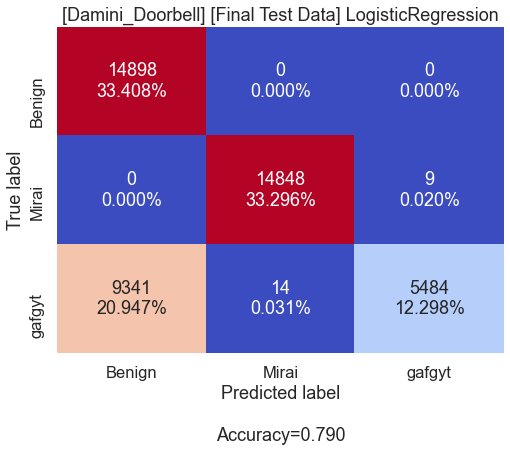

In [7]:
# Run plain vanila FSM LogisticRegression model with all default inpts - binary target
damini_iot.iot_Model("LogisticRegression")

In [8]:
import collections
print("      Train: ",collections.Counter(damini_iot.lg_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.lg_val_prediction))
print("       Test: ", collections.Counter(damini_iot.lg_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))

      Train:  Counter({0: 39548, 1: 24304, 2: 8983})
 Validation:  Counter({0: 17009, 1: 10405, 2: 3801})
       Test:  Counter({0: 24239, 1: 14862, 2: 5493})
      Label:  Counter({0: 14898, 1: 14857, 2: 14839})


> Looks very good. 2.73% False Negatives nad 0.05% False positives <BR>
> Gafgyt traffic's are identified more accurately than the Mirai attaks.<BR>
> Overall Accuracy of 0.972, Type 1 errors (false positives)0.05%. <BR>


## Model 3: KNeighborsClassifier -- Target = binary; Benign(=0), Mirai(=1), Gafgyt(=2)
> After running this, found it is ccomuputationally very expensive
> It's Accuracy is lot lower than Logistic Regeression.


***** [Damini_Doorbell] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     24099
           1      1.000     1.000     1.000     24293
           2      1.000     0.999     0.999     24443

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835



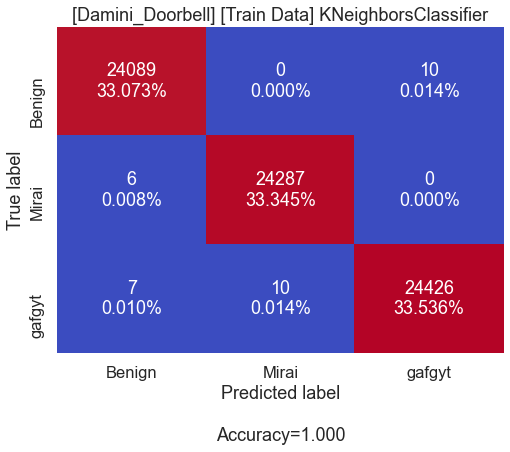


***** [Damini_Doorbell] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10551
           1      0.999     1.000     1.000     10398
           2      1.000     0.999     0.999     10266

    accuracy                          1.000     31215
   macro avg      1.000     1.000     1.000     31215
weighted avg      1.000     1.000     1.000     31215



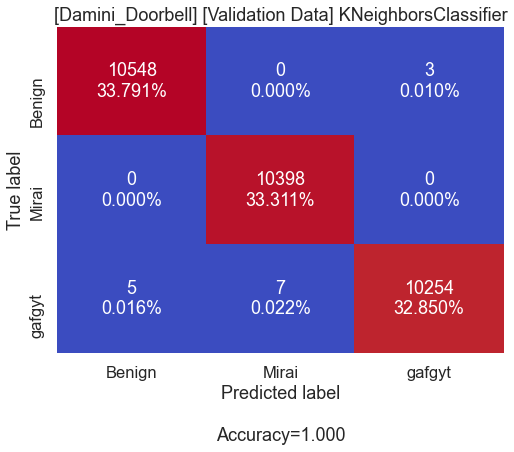


***** [Damini_Doorbell] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14898
           1      1.000     1.000     1.000     14857
           2      1.000     0.999     1.000     14839

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



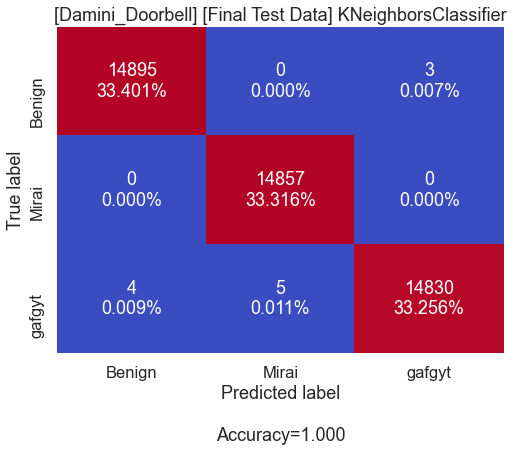

In [9]:
damini_iot.iot_Model("KNeighborsClassifier")

In [10]:
print("\n      Train: ",collections.Counter(damini_iot.knn_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.knn_val_prediction))
print("       Test: ", collections.Counter(damini_iot.knn_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({2: 24436, 1: 24297, 0: 24102})
 Validation:  Counter({0: 10553, 1: 10405, 2: 10257})
       Test:  Counter({0: 14899, 1: 14862, 2: 14833})
      Label:  Counter({0: 14898, 1: 14857, 2: 14839})






### Model 4: "DecisionTreeClassifier" -- Target = binary; Benign(=0), Mirai(=1), Gafgyt(=2)


***** [Damini_Doorbell] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     24099
           1      1.000     1.000     1.000     24293
           2      1.000     1.000     1.000     24443

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835



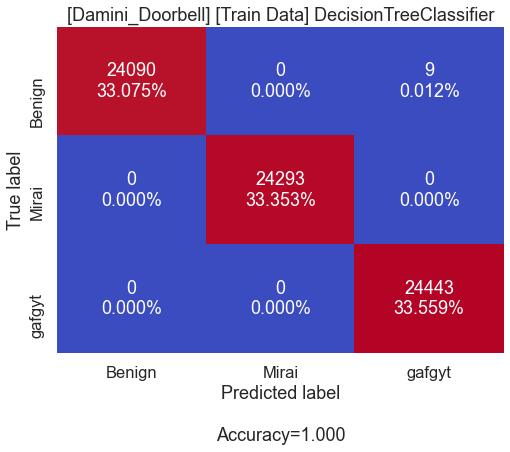


***** [Damini_Doorbell] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10551
           1      0.999     1.000     0.999     10398
           2      0.999     0.999     0.999     10266

    accuracy                          0.999     31215
   macro avg      0.999     0.999     0.999     31215
weighted avg      0.999     0.999     0.999     31215



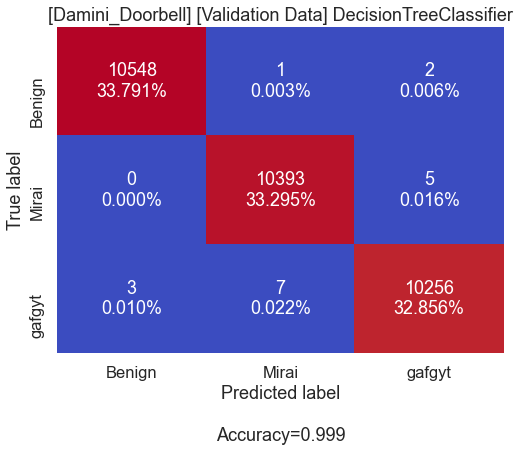


***** [Damini_Doorbell] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14898
           1      1.000     1.000     1.000     14857
           2      0.999     1.000     1.000     14839

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



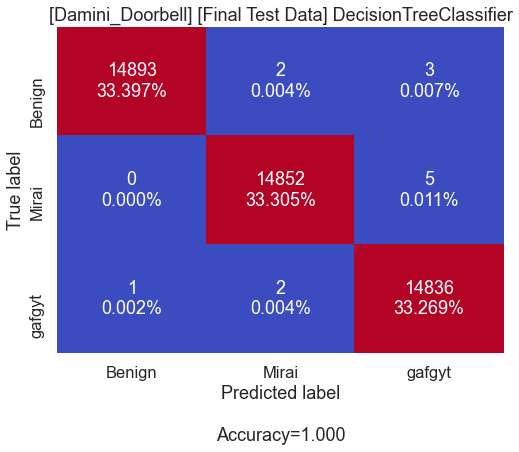

In [11]:
damini_iot.iot_Model("DecisionTreeClassifier")

In [12]:
print("\n      Train: ",collections.Counter(damini_iot.dt_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.dt_val_prediction))
print("       Test: ", collections.Counter(damini_iot.dt_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({2: 24452, 1: 24293, 0: 24090})
 Validation:  Counter({0: 10551, 1: 10401, 2: 10263})
       Test:  Counter({0: 14894, 1: 14856, 2: 14844})
      Label:  Counter({0: 14898, 1: 14857, 2: 14839})






## Model 4: RandomForestClassifier
> Run GridSearchcv with parameters { 'max_depth': [ 2, 5, 10 ], 'n_estimators': [ 100, 1000, 2000]}


***** [Damini_Doorbell] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     24099
           1      1.000     1.000     1.000     24293
           2      1.000     1.000     1.000     24443

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835



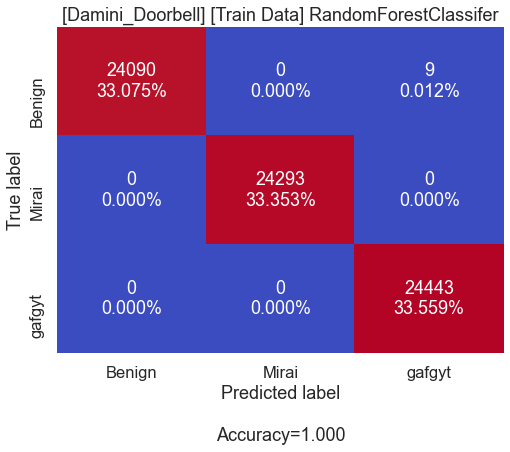


***** [Damini_Doorbell] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10551
           1      1.000     1.000     1.000     10398
           2      1.000     1.000     1.000     10266

    accuracy                          1.000     31215
   macro avg      1.000     1.000     1.000     31215
weighted avg      1.000     1.000     1.000     31215



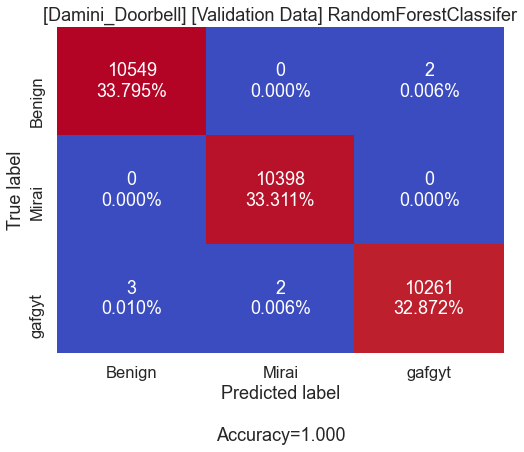


***** [Damini_Doorbell] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14898
           1      1.000     1.000     1.000     14857
           2      1.000     1.000     1.000     14839

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



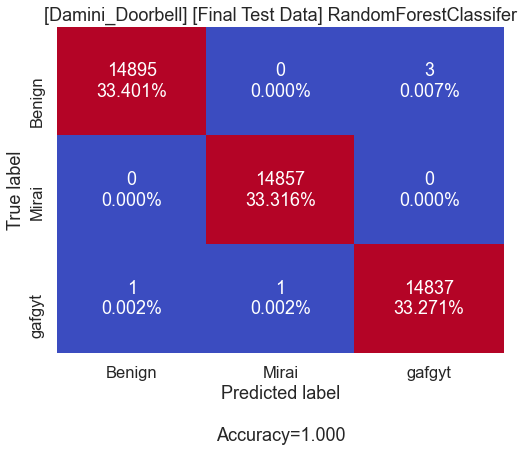

In [13]:
damini_iot.iot_Model("RandomForestClassifer")

In [14]:
print("\n      Train: ",collections.Counter(damini_iot.rfc_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.rfc_val_prediction))
print("       Test: ", collections.Counter(damini_iot.rfc_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({2: 24452, 1: 24293, 0: 24090})
 Validation:  Counter({0: 10552, 1: 10400, 2: 10263})
       Test:  Counter({0: 14896, 1: 14858, 2: 14840})
      Label:  Counter({0: 14898, 1: 14857, 2: 14839})






In [15]:
# damini_iot.iot_compare_recall_accuracy("KNeighborsClassifier")

# Model 5: XGBoost


***** [Damini_Doorbell] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     24099
           1      1.000     1.000     1.000     24293
           2      1.000     1.000     1.000     24443

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835



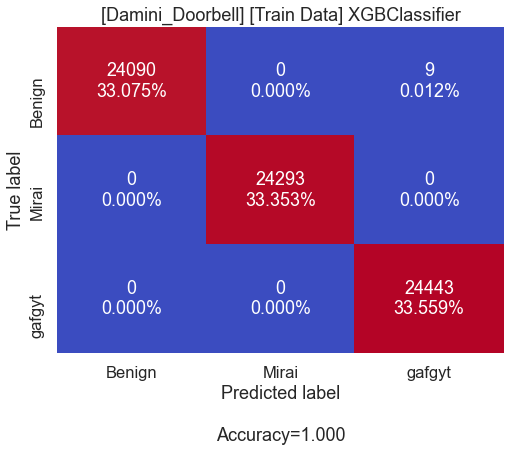


***** [Damini_Doorbell] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10551
           1      0.999     1.000     1.000     10398
           2      1.000     0.999     0.999     10266

    accuracy                          1.000     31215
   macro avg      1.000     1.000     1.000     31215
weighted avg      1.000     1.000     1.000     31215



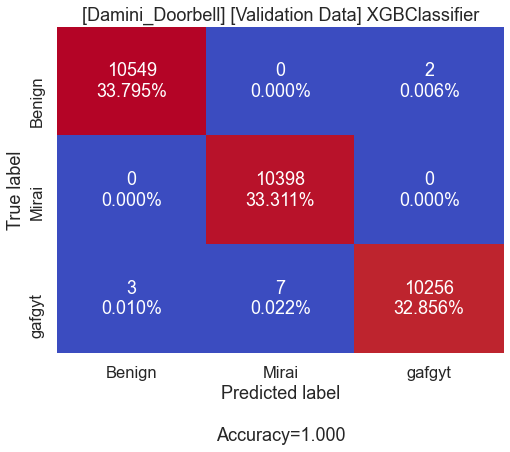


***** [Damini_Doorbell] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14898
           1      1.000     1.000     1.000     14857
           2      1.000     1.000     1.000     14839

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



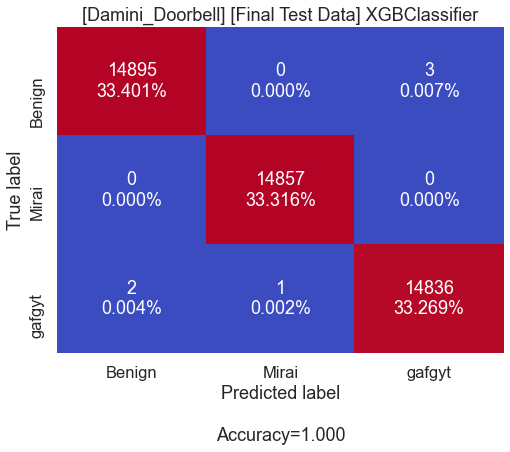

In [16]:
# XGBoost
damini_iot.iot_Model("XGBClassifier")

In [17]:
print("\n      Train: ",collections.Counter(damini_iot.xgb_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.xgb_val_prediction))
print("       Test: ", collections.Counter(damini_iot.xgb_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({2: 24452, 1: 24293, 0: 24090})
 Validation:  Counter({0: 10552, 1: 10405, 2: 10258})
       Test:  Counter({0: 14897, 1: 14858, 2: 14839})
      Label:  Counter({0: 14898, 1: 14857, 2: 14839})






# 1) * Run LogisticalRegression, KNN, DecisionTree, RandomForest, and XGBoos for all 9 IoT devices

In [19]:
def model_factory(iot):
    '''
    Function: model_factory
    Input: class instantiated when IoT_Device class was instantiated - this correspond to requested IoT evice
    Action: Run all 5 models, print confusion matrix, print key statistics
    '''
    iot.iot_Model("LogisticRegression")
    print("      Train: ", collections.Counter(iot.lg_train_prediction))
    print(" Validation: ", collections.Counter(iot.lg_val_prediction))
    print("       Test: ", collections.Counter(iot.lg_test_prediction)) 
    print("      Label: ", collections.Counter(iot.lg_test_prediction)) 
    print("\n\n")

    iot.iot_Model("KNeighborsClassifier")
    print("      Train: ",collections.Counter(iot.knn_train_prediction))
    print(" Validation: ",collections.Counter(iot.knn_val_prediction))
    print("       Test: ", collections.Counter(iot.knn_test_prediction))  
    print("      Label: ", collections.Counter(iot.knn_test_prediction)) 
    print("\n\n")    
    
    iot.iot_Model("DecisionTreeClassifier")
    print("      Train: ",collections.Counter(iot.dt_train_prediction))
    print(" Validation: ",collections.Counter(iot.dt_val_prediction))
    print("       Test: ", collections.Counter(iot.dt_test_prediction))    
    print("      Label: ", collections.Counter(iot.dt_test_prediction)) 
    print("\n\n") 
    
    iot.iot_Model("RandomForestClassifer")
    print("      Train: ",collections.Counter(iot.rfc_train_prediction))
    print(" Validation: ",collections.Counter(iot.rfc_val_prediction))
    print("       Test: ", collections.Counter(iot.rfc_test_prediction))
    print("      Label: ",collections.Counter(iot.y_test))
    print("\n\n")
    
    iot.iot_Model("XGBClassifier")
    print("      Train: ",collections.Counter(iot.xgb_train_prediction))
    print(" Validation: ",collections.Counter(iot.xgb_val_prediction))
    print("       Test: ", collections.Counter(iot.xgb_test_prediction))
    print("      Label: ",collections.Counter(iot.y_test))
    print("\n\n")

# 2) *** Device: Ennino Doorbell ***
> Instantiate class IoT_Device.

>> Read datafiles and reate predictor and target data stored in the class
>> Call IoT_Device methods run predit models

../../data_prep/Ennino_Doorbell.pkl
Pickle file for Ennino Doorbell is already created.
Do you want to overwrite it? [Yes/No]
Ready to pickle the device ..  Shape: 117300

***** [Ennino_Doorbell] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.607     0.998     0.755     19235
           1      0.995     0.993     0.994     19197
           2      0.977     0.345     0.510     19045

    accuracy                          0.780     57477
   macro avg      0.860     0.779     0.753     57477
weighted avg      0.859     0.780     0.754     57477



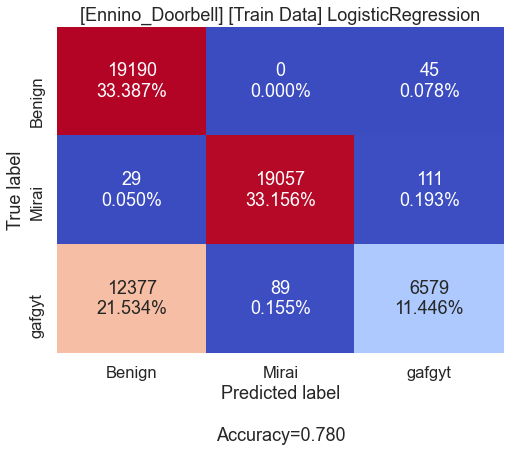


***** [Ennino_Doorbell] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.601     0.998     0.750      8220
           1      0.995     0.992     0.993      8159
           2      0.976     0.336     0.500      8254

    accuracy                          0.774     24633
   macro avg      0.857     0.775     0.748     24633
weighted avg      0.857     0.774     0.747     24633



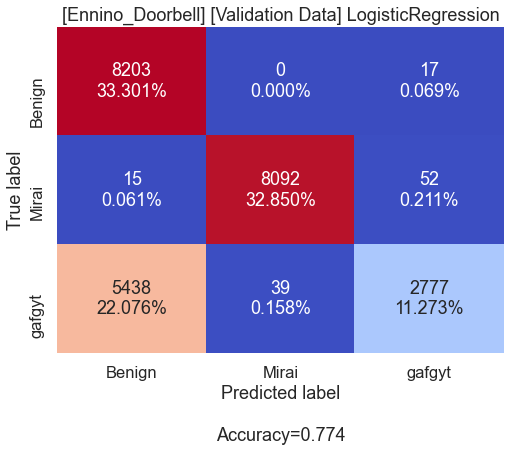


***** [Ennino_Doorbell] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.600     0.998     0.750     11645
           1      0.996     0.994     0.995     11744
           2      0.980     0.343     0.508     11801

    accuracy                          0.777     35190
   macro avg      0.859     0.778     0.751     35190
weighted avg      0.860     0.777     0.750     35190



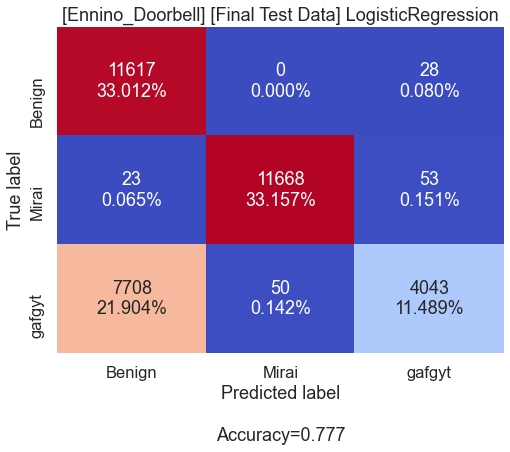

      Train:  Counter({0: 31596, 1: 19146, 2: 6735})
 Validation:  Counter({0: 13656, 1: 8131, 2: 2846})
       Test:  Counter({0: 19348, 1: 11718, 2: 4124})
      Label:  Counter({0: 19348, 1: 11718, 2: 4124})




***** [Ennino_Doorbell] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     19235
           1      0.999     1.000     0.999     19197
           2      0.999     0.999     0.999     19045

    accuracy                          0.999     57477
   macro avg      0.999     0.999     0.999     57477
weighted avg      0.999     0.999     0.999     57477



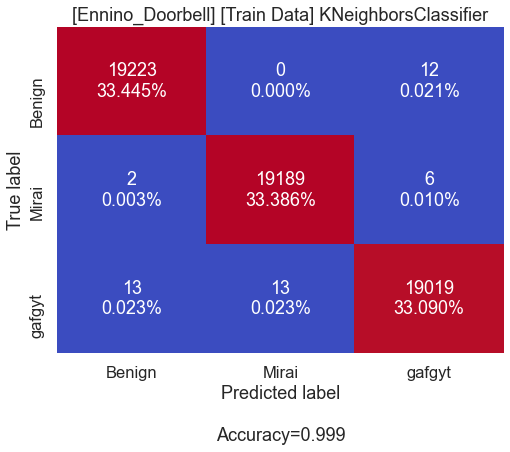


***** [Ennino_Doorbell] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      8220
           1      0.999     0.999     0.999      8159
           2      0.998     0.999     0.998      8254

    accuracy                          0.999     24633
   macro avg      0.999     0.999     0.999     24633
weighted avg      0.999     0.999     0.999     24633



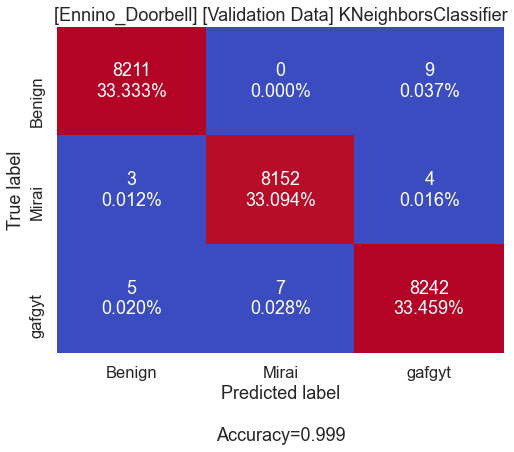


***** [Ennino_Doorbell] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     11645
           1      0.999     0.999     0.999     11744
           2      0.999     0.999     0.999     11801

    accuracy                          0.999     35190
   macro avg      0.999     0.999     0.999     35190
weighted avg      0.999     0.999     0.999     35190



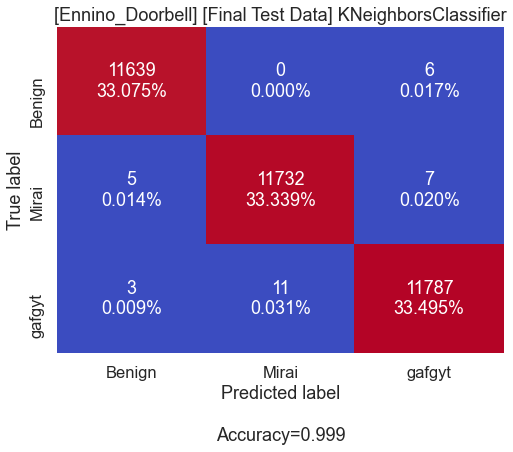

      Train:  Counter({0: 19238, 1: 19202, 2: 19037})
 Validation:  Counter({2: 8255, 0: 8219, 1: 8159})
       Test:  Counter({2: 11800, 1: 11743, 0: 11647})
      Label:  Counter({2: 11800, 1: 11743, 0: 11647})




***** [Ennino_Doorbell] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     19235
           1      1.000     1.000     1.000     19197
           2      0.999     1.000     1.000     19045

    accuracy                          1.000     57477
   macro avg      1.000     1.000     1.000     57477
weighted avg      1.000     1.000     1.000     57477



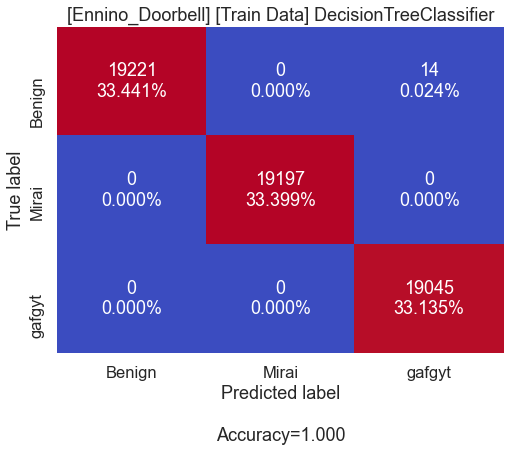


***** [Ennino_Doorbell] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      8220
           1      1.000     1.000     1.000      8159
           2      0.999     0.999     0.999      8254

    accuracy                          0.999     24633
   macro avg      0.999     0.999     0.999     24633
weighted avg      0.999     0.999     0.999     24633



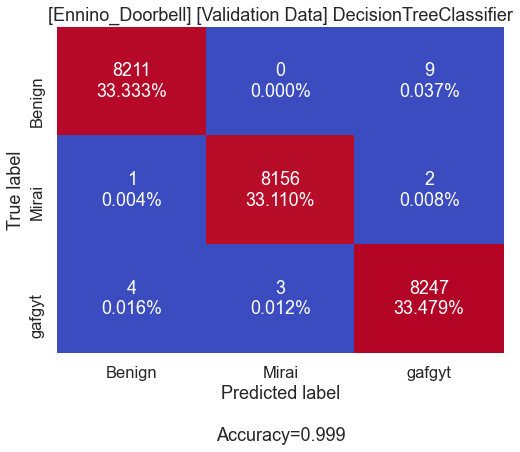


***** [Ennino_Doorbell] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     11645
           1      1.000     0.999     0.999     11744
           2      0.999     0.999     0.999     11801

    accuracy                          0.999     35190
   macro avg      0.999     0.999     0.999     35190
weighted avg      0.999     0.999     0.999     35190



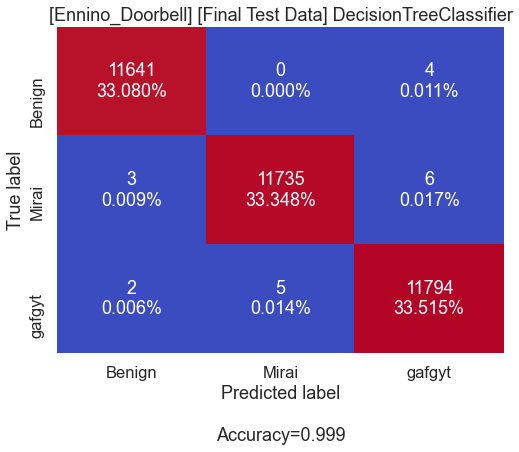

      Train:  Counter({0: 19221, 1: 19197, 2: 19059})
 Validation:  Counter({2: 8258, 0: 8216, 1: 8159})
       Test:  Counter({2: 11804, 1: 11740, 0: 11646})
      Label:  Counter({2: 11804, 1: 11740, 0: 11646})




***** [Ennino_Doorbell] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     19235
           1      1.000     1.000     1.000     19197
           2      0.999     1.000     1.000     19045

    accuracy                          1.000     57477
   macro avg      1.000     1.000     1.000     57477
weighted avg      1.000     1.000     1.000     57477



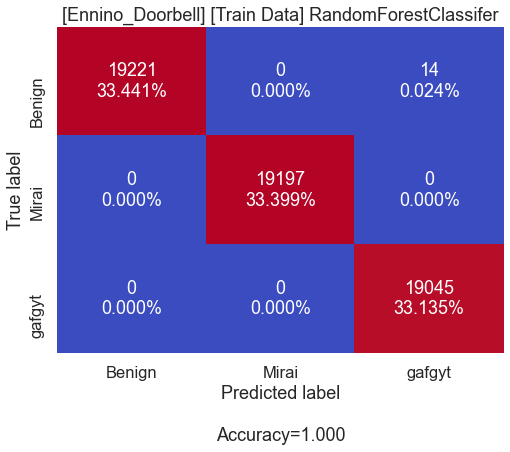


***** [Ennino_Doorbell] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      8220
           1      1.000     1.000     1.000      8159
           2      0.999     0.999     0.999      8254

    accuracy                          0.999     24633
   macro avg      0.999     0.999     0.999     24633
weighted avg      0.999     0.999     0.999     24633



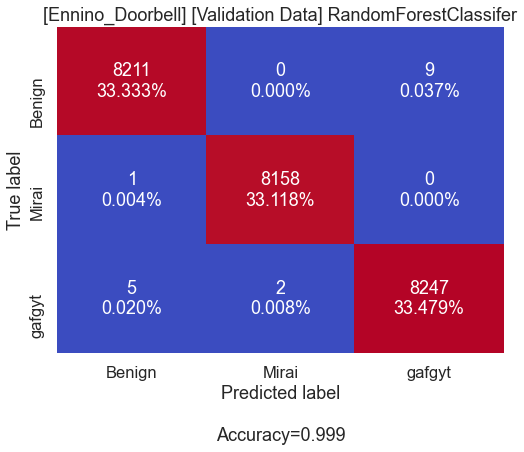


***** [Ennino_Doorbell] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     11645
           1      1.000     1.000     1.000     11744
           2      1.000     1.000     1.000     11801

    accuracy                          1.000     35190
   macro avg      1.000     1.000     1.000     35190
weighted avg      1.000     1.000     1.000     35190



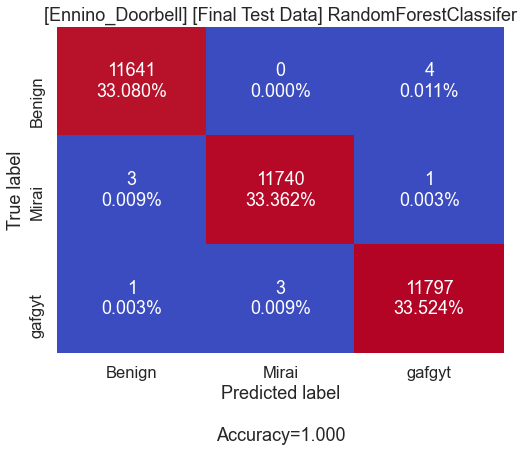

      Train:  Counter({0: 19221, 1: 19197, 2: 19059})
 Validation:  Counter({2: 8256, 0: 8217, 1: 8160})
       Test:  Counter({2: 11802, 1: 11743, 0: 11645})
      Label:  Counter({2: 11801, 1: 11744, 0: 11645})




***** [Ennino_Doorbell] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     19235
           1      1.000     1.000     1.000     19197
           2      0.999     1.000     1.000     19045

    accuracy                          1.000     57477
   macro avg      1.000     1.000     1.000     57477
weighted avg      1.000     1.000     1.000     57477



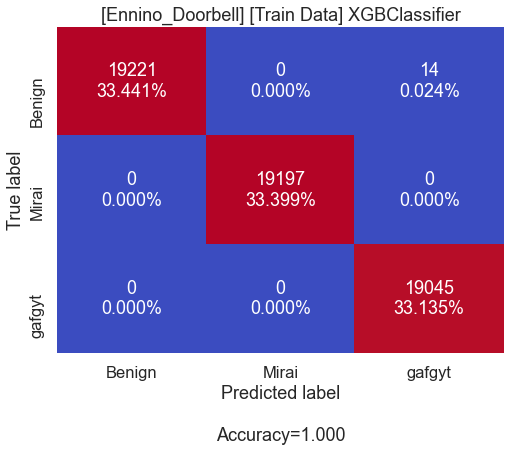


***** [Ennino_Doorbell] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      8220
           1      1.000     0.999     0.999      8159
           2      0.998     0.999     0.999      8254

    accuracy                          0.999     24633
   macro avg      0.999     0.999     0.999     24633
weighted avg      0.999     0.999     0.999     24633



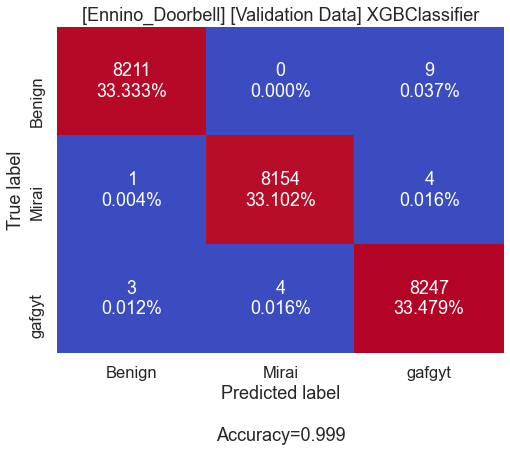


***** [Ennino_Doorbell] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     11645
           1      1.000     0.999     0.999     11744
           2      0.999     1.000     0.999     11801

    accuracy                          1.000     35190
   macro avg      1.000     1.000     1.000     35190
weighted avg      1.000     1.000     1.000     35190



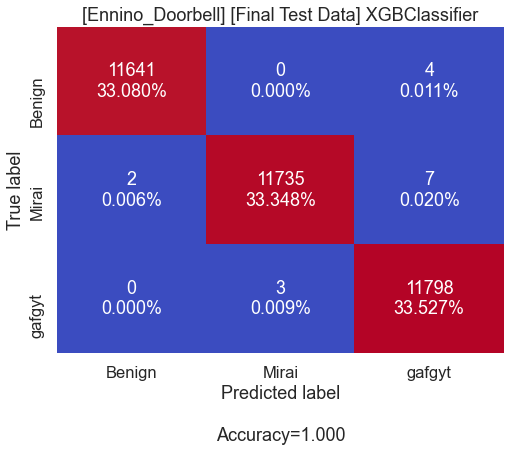

      Train:  Counter({0: 19221, 1: 19197, 2: 19059})
 Validation:  Counter({2: 8260, 0: 8215, 1: 8158})
       Test:  Counter({2: 11809, 1: 11738, 0: 11643})
      Label:  Counter({2: 11801, 1: 11744, 0: 11645})





In [20]:
# Read the pickle file or intantiate IoT_Device
ennino_iot = read_device_pickle(ENNINO_DOORBELL) 
print("Pickle file for Ennino Doorbell is already created.\nDo you want to overwrite it? [Yes/No]", )
if ennino_iot == None:
    # Instantiate class IoT_Device
    ennino_iot = IoT_Device(ENNINO_DOORBELL)
    
    #Pickle the object
    write_device_pickle(ennino_iot, ENNINO_DOORBELL)
model_factory(ennino_iot)

# 3) * Ecobee_Thermostat *

../../data_prep/Ecobee_Thermostat.pkl
Ready to pickle the device ..  Shape: 39339

***** [Ecobee_Thermostat] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.606     1.000     0.754      6358
           1      0.993     0.993     0.993      6490
           2      0.980     0.349     0.515      6427

    accuracy                          0.781     19275
   macro avg      0.860     0.781     0.754     19275
weighted avg      0.861     0.781     0.755     19275



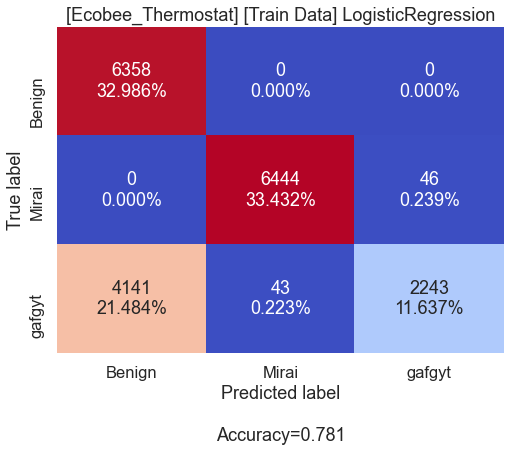


***** [Ecobee_Thermostat] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.615     1.000     0.761      2796
           1      0.994     0.993     0.993      2725
           2      0.981     0.354     0.520      2741

    accuracy                          0.783      8262
   macro avg      0.863     0.782     0.758      8262
weighted avg      0.861     0.783     0.758      8262



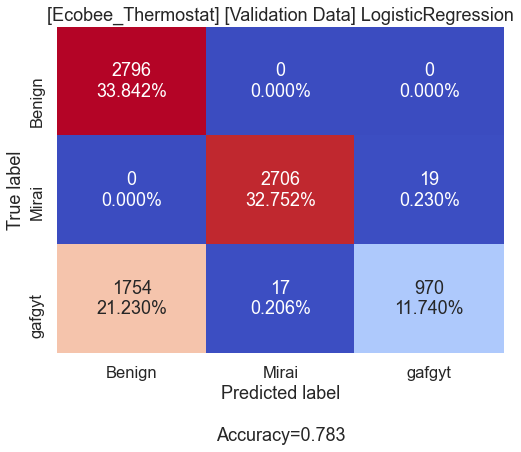


***** [Ecobee_Thermostat] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.606     1.000     0.755      3959
           1      0.992     0.994     0.993      3898
           2      0.984     0.340     0.505      3945

    accuracy                          0.777     11802
   macro avg      0.861     0.778     0.751     11802
weighted avg      0.860     0.777     0.750     11802



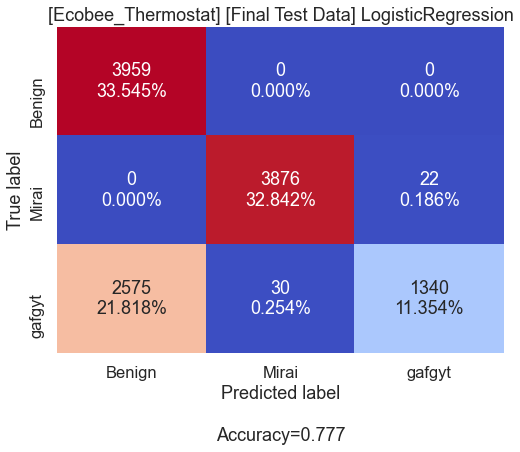

      Train:  Counter({0: 10499, 1: 6487, 2: 2289})
 Validation:  Counter({0: 4550, 1: 2723, 2: 989})
       Test:  Counter({0: 6534, 1: 3906, 2: 1362})
      Label:  Counter({0: 6534, 1: 3906, 2: 1362})




***** [Ecobee_Thermostat] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      6358
           1      0.999     0.999     0.999      6490
           2      0.999     0.998     0.998      6427

    accuracy                          0.999     19275
   macro avg      0.999     0.999     0.999     19275
weighted avg      0.999     0.999     0.999     19275



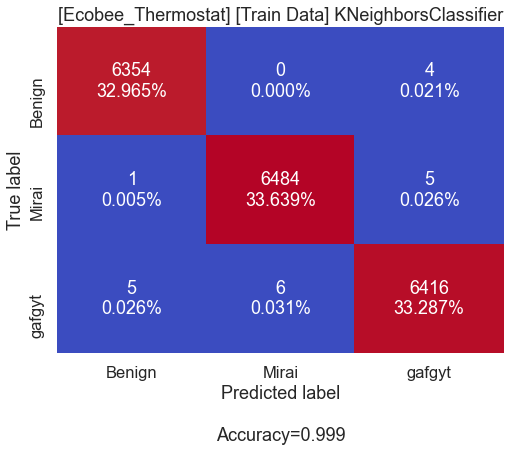


***** [Ecobee_Thermostat] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      2796
           1      1.000     0.999     0.999      2725
           2      0.997     1.000     0.998      2741

    accuracy                          0.999      8262
   macro avg      0.999     0.999     0.999      8262
weighted avg      0.999     0.999     0.999      8262



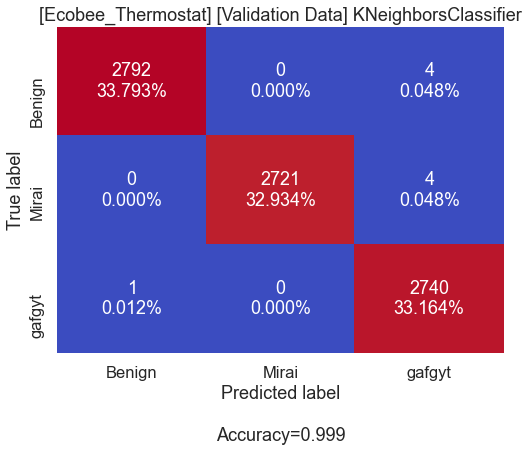


***** [Ecobee_Thermostat] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      3959
           1      0.998     1.000     0.999      3898
           2      0.999     0.997     0.998      3945

    accuracy                          0.999     11802
   macro avg      0.999     0.999     0.999     11802
weighted avg      0.999     0.999     0.999     11802



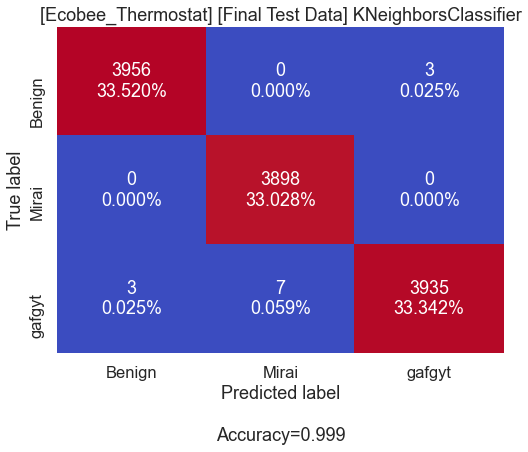

      Train:  Counter({1: 6490, 2: 6425, 0: 6360})
 Validation:  Counter({0: 2793, 2: 2748, 1: 2721})
       Test:  Counter({0: 3959, 2: 3938, 1: 3905})
      Label:  Counter({0: 3959, 2: 3938, 1: 3905})




***** [Ecobee_Thermostat] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6358
           1      1.000     1.000     1.000      6490
           2      1.000     1.000     1.000      6427

    accuracy                          1.000     19275
   macro avg      1.000     1.000     1.000     19275
weighted avg      1.000     1.000     1.000     19275



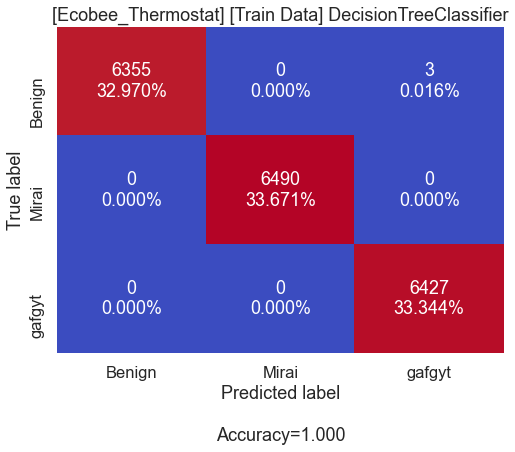


***** [Ecobee_Thermostat] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      2796
           1      0.999     0.999     0.999      2725
           2      0.998     0.998     0.998      2741

    accuracy                          0.999      8262
   macro avg      0.999     0.999     0.999      8262
weighted avg      0.999     0.999     0.999      8262



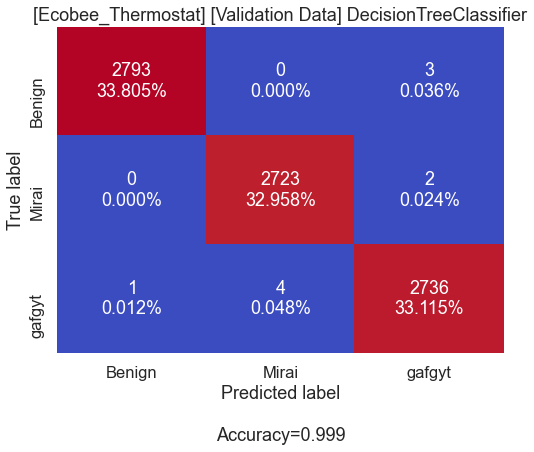


***** [Ecobee_Thermostat] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      3959
           1      0.999     0.998     0.999      3898
           2      0.997     0.999     0.998      3945

    accuracy                          0.999     11802
   macro avg      0.999     0.999     0.999     11802
weighted avg      0.999     0.999     0.999     11802



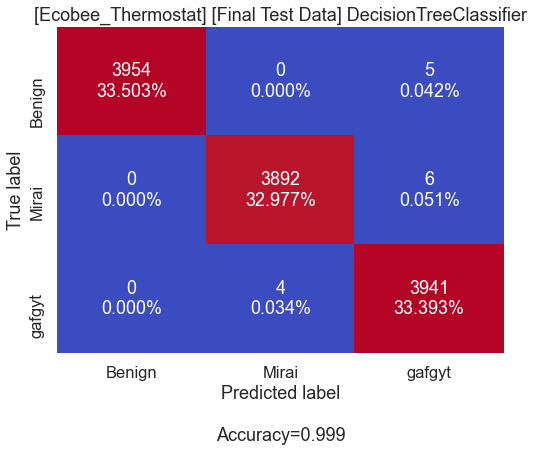

      Train:  Counter({1: 6490, 2: 6430, 0: 6355})
 Validation:  Counter({0: 2794, 2: 2741, 1: 2727})
       Test:  Counter({0: 3954, 2: 3952, 1: 3896})
      Label:  Counter({0: 3954, 2: 3952, 1: 3896})




***** [Ecobee_Thermostat] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6358
           1      1.000     1.000     1.000      6490
           2      1.000     1.000     1.000      6427

    accuracy                          1.000     19275
   macro avg      1.000     1.000     1.000     19275
weighted avg      1.000     1.000     1.000     19275



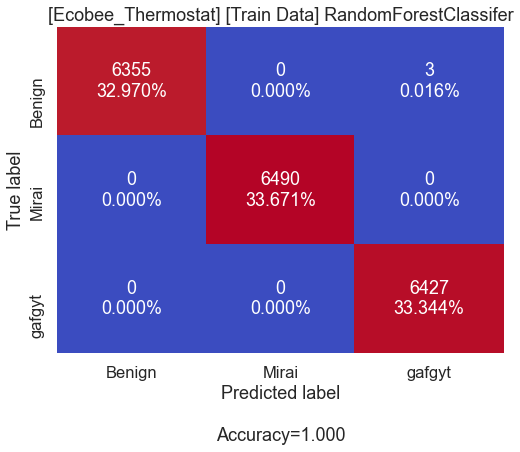


***** [Ecobee_Thermostat] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      2796
           1      1.000     1.000     1.000      2725
           2      0.999     1.000     0.999      2741

    accuracy                          1.000      8262
   macro avg      1.000     1.000     1.000      8262
weighted avg      1.000     1.000     1.000      8262



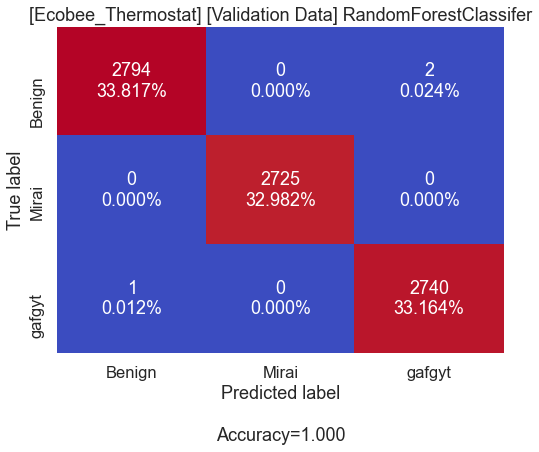


***** [Ecobee_Thermostat] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      3959
           1      0.999     1.000     0.999      3898
           2      0.999     0.999     0.999      3945

    accuracy                          0.999     11802
   macro avg      0.999     0.999     0.999     11802
weighted avg      0.999     0.999     0.999     11802



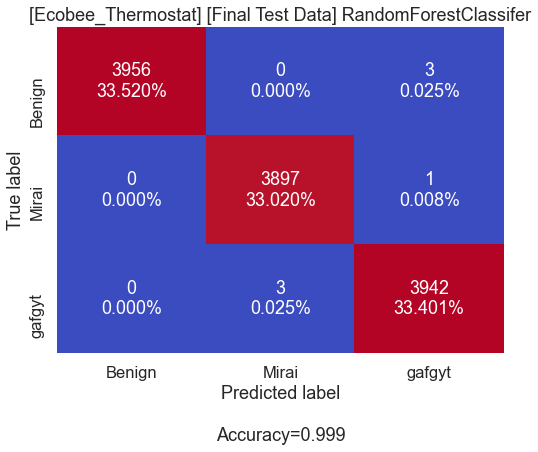

      Train:  Counter({1: 6490, 2: 6430, 0: 6355})
 Validation:  Counter({0: 2795, 2: 2742, 1: 2725})
       Test:  Counter({0: 3956, 2: 3946, 1: 3900})
      Label:  Counter({0: 3959, 2: 3945, 1: 3898})




***** [Ecobee_Thermostat] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6358
           1      1.000     1.000     1.000      6490
           2      1.000     1.000     1.000      6427

    accuracy                          1.000     19275
   macro avg      1.000     1.000     1.000     19275
weighted avg      1.000     1.000     1.000     19275



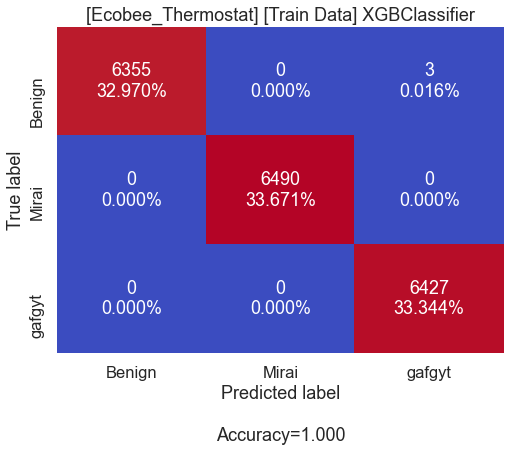


***** [Ecobee_Thermostat] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      2796
           1      1.000     1.000     1.000      2725
           2      0.999     1.000     0.999      2741

    accuracy                          1.000      8262
   macro avg      1.000     1.000     1.000      8262
weighted avg      1.000     1.000     1.000      8262



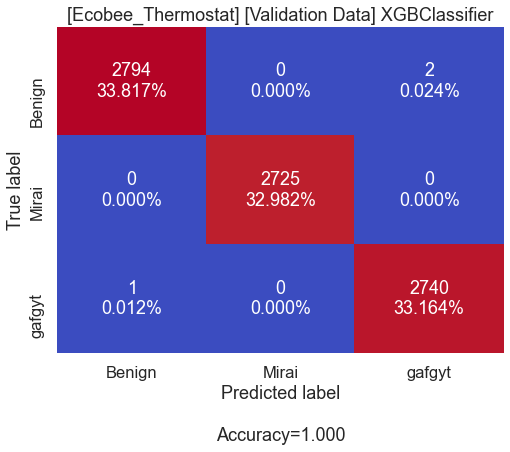


***** [Ecobee_Thermostat] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      3959
           1      0.999     1.000     1.000      3898
           2      0.999     0.999     0.999      3945

    accuracy                          0.999     11802
   macro avg      0.999     0.999     0.999     11802
weighted avg      0.999     0.999     0.999     11802



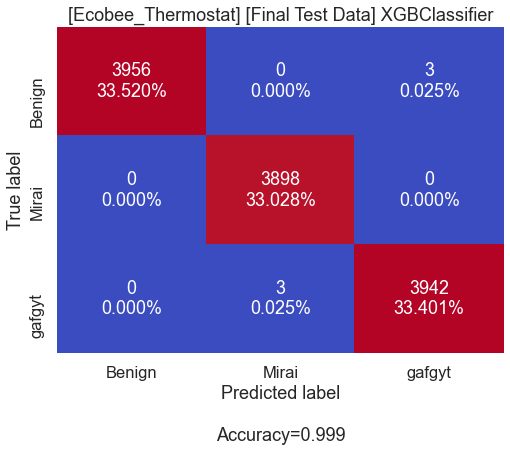

      Train:  Counter({1: 6490, 2: 6430, 0: 6355})
 Validation:  Counter({0: 2795, 2: 2742, 1: 2725})
       Test:  Counter({0: 3956, 2: 3945, 1: 3901})
      Label:  Counter({0: 3959, 2: 3945, 1: 3898})





In [21]:
# Read the pickle file or intantiate IoT_Device
ecobee_iot = read_device_pickle(ECOBEE_THERMOSTAT)    
if ecobee_iot == None:
    # Instantiate class IoT_Device
    ecobee_iot = IoT_Device(ECOBEE_THERMOSTAT)
    
    #Pickle the object
    write_device_pickle(ecobee_iot, ECOBEE_THERMOSTAT)
model_factory(ecobee_iot)

# 4) * Philips_B120N10_Baby_Monitor *

../../data_prep/Philips_B120N10_Baby_Monitor.pkl
Ready to pickle the device ..  Shape: 525720

***** [Philips_B120N10_Baby_Monitor] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.611     0.993     0.757     85918
           1      0.999     0.999     0.999     85965
           2      0.981     0.367     0.535     85719

    accuracy                          0.787    257602
   macro avg      0.864     0.786     0.763    257602
weighted avg      0.864     0.787     0.764    257602



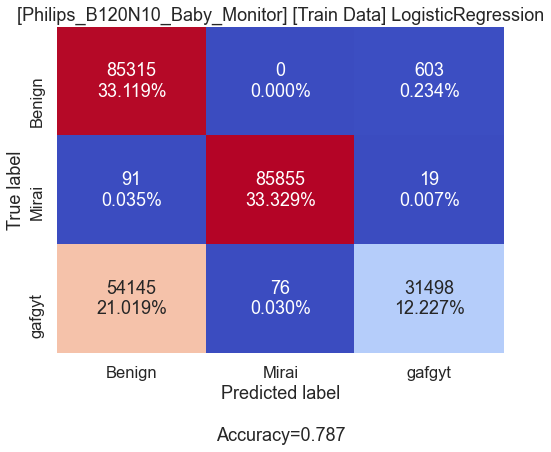


***** [Philips_B120N10_Baby_Monitor] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.607     0.992     0.753     36744
           1      0.999     0.999     0.999     36729
           2      0.979     0.361     0.527     36929

    accuracy                          0.783    110402
   macro avg      0.862     0.784     0.760    110402
weighted avg      0.862     0.783     0.759    110402



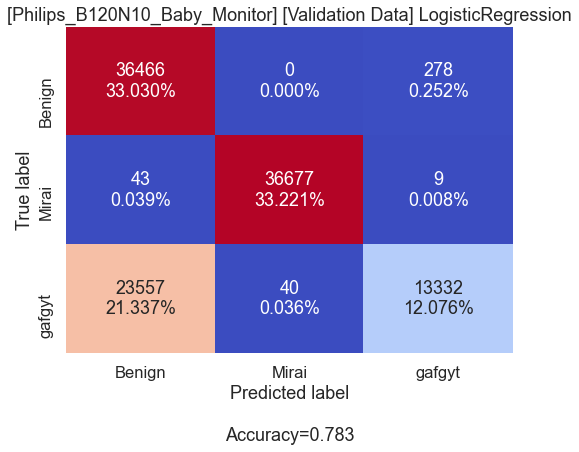


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.608     0.993     0.754     52578
           1      0.999     0.999     0.999     52546
           2      0.979     0.362     0.528     52592

    accuracy                          0.784    157716
   macro avg      0.862     0.784     0.761    157716
weighted avg      0.862     0.784     0.760    157716



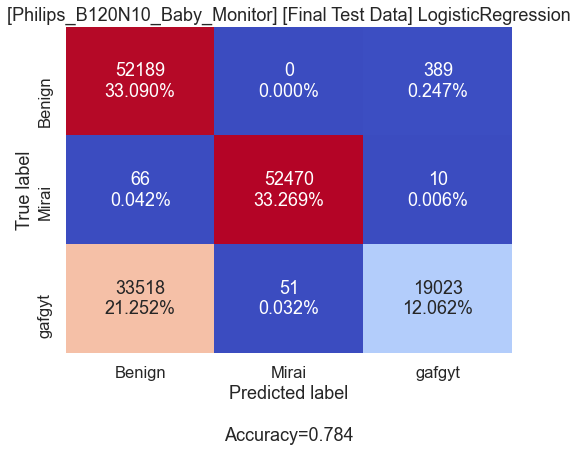

      Train:  Counter({0: 139551, 1: 85931, 2: 32120})
 Validation:  Counter({0: 60066, 1: 36717, 2: 13619})
       Test:  Counter({0: 85773, 1: 52521, 2: 19422})
      Label:  Counter({0: 85773, 1: 52521, 2: 19422})




***** [Philips_B120N10_Baby_Monitor] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     85918
           1      1.000     1.000     1.000     85965
           2      1.000     0.999     1.000     85719

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



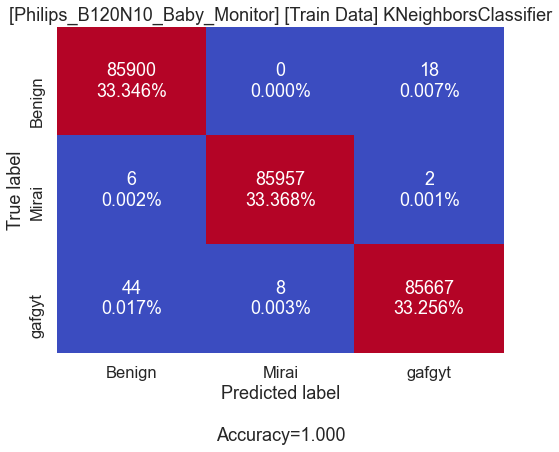


***** [Philips_B120N10_Baby_Monitor] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     36744
           1      1.000     1.000     1.000     36729
           2      1.000     0.999     1.000     36929

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



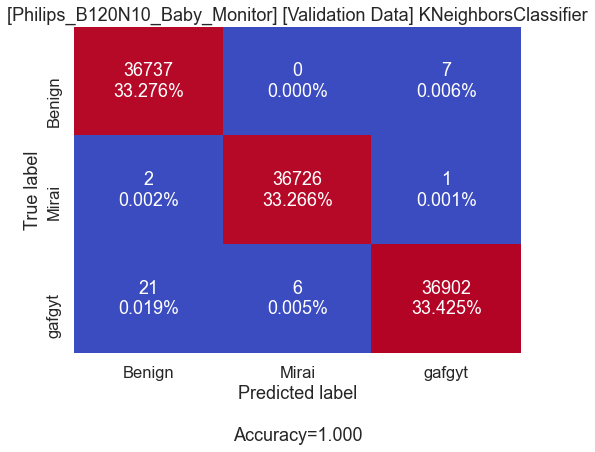


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     52578
           1      1.000     1.000     1.000     52546
           2      1.000     0.999     1.000     52592

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



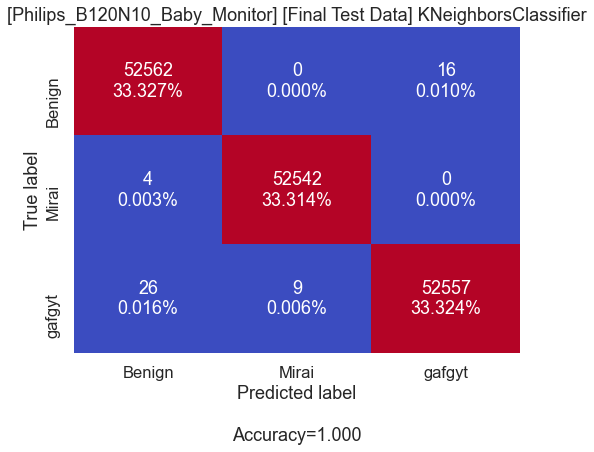

      Train:  Counter({1: 85965, 0: 85950, 2: 85687})
 Validation:  Counter({2: 36910, 0: 36760, 1: 36732})
       Test:  Counter({0: 52592, 2: 52573, 1: 52551})
      Label:  Counter({0: 52592, 2: 52573, 1: 52551})




***** [Philips_B120N10_Baby_Monitor] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85918
           1      1.000     1.000     1.000     85965
           2      1.000     1.000     1.000     85719

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



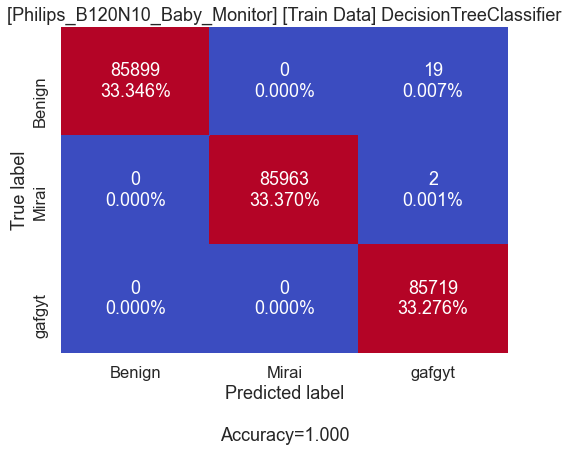


***** [Philips_B120N10_Baby_Monitor] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     36744
           1      1.000     1.000     1.000     36729
           2      0.999     0.999     0.999     36929

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



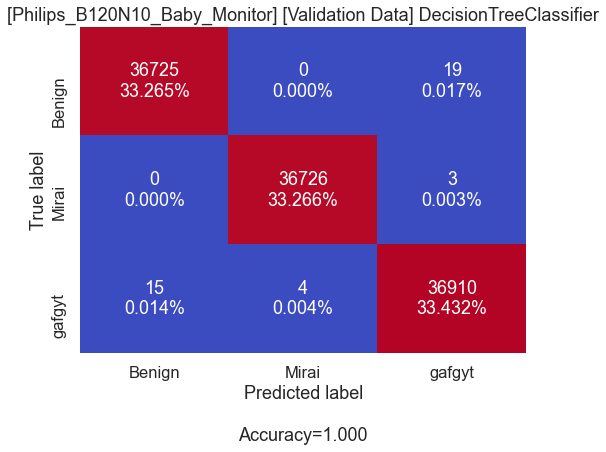


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     52578
           1      1.000     1.000     1.000     52546
           2      0.999     1.000     0.999     52592

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



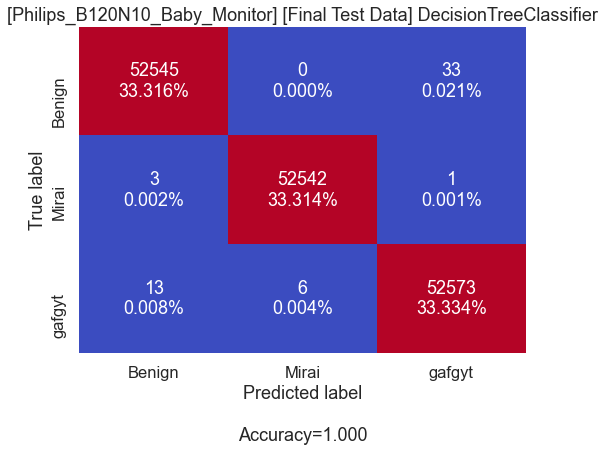

      Train:  Counter({1: 85963, 0: 85899, 2: 85740})
 Validation:  Counter({2: 36932, 0: 36740, 1: 36730})
       Test:  Counter({2: 52607, 0: 52561, 1: 52548})
      Label:  Counter({2: 52607, 0: 52561, 1: 52548})




***** [Philips_B120N10_Baby_Monitor] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85918
           1      1.000     1.000     1.000     85965
           2      1.000     1.000     1.000     85719

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



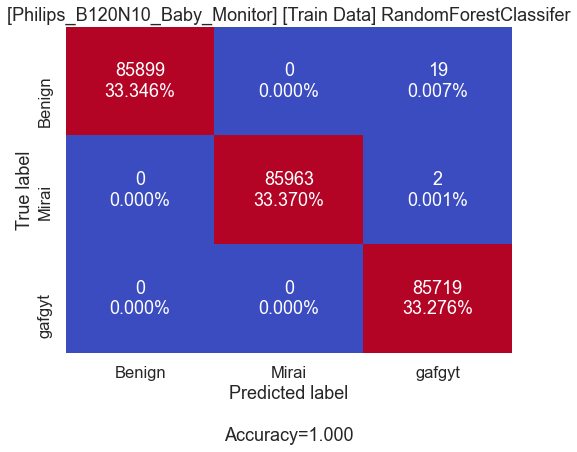


***** [Philips_B120N10_Baby_Monitor] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36744
           1      1.000     1.000     1.000     36729
           2      1.000     1.000     1.000     36929

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



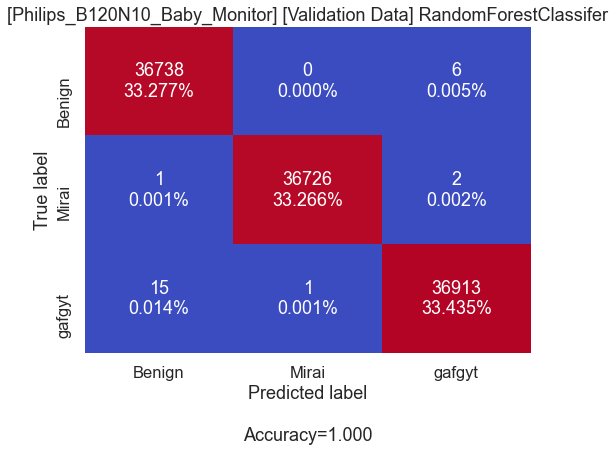


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     52578
           1      1.000     1.000     1.000     52546
           2      1.000     1.000     1.000     52592

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



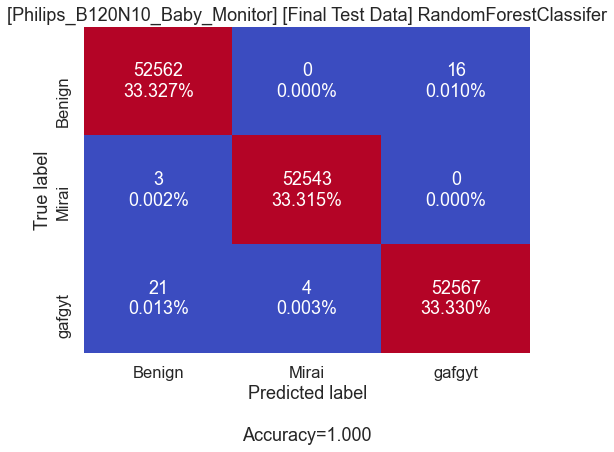

      Train:  Counter({1: 85963, 0: 85899, 2: 85740})
 Validation:  Counter({2: 36921, 0: 36754, 1: 36727})
       Test:  Counter({0: 52586, 2: 52583, 1: 52547})
      Label:  Counter({2: 52592, 0: 52578, 1: 52546})




***** [Philips_B120N10_Baby_Monitor] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85918
           1      1.000     1.000     1.000     85965
           2      1.000     1.000     1.000     85719

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



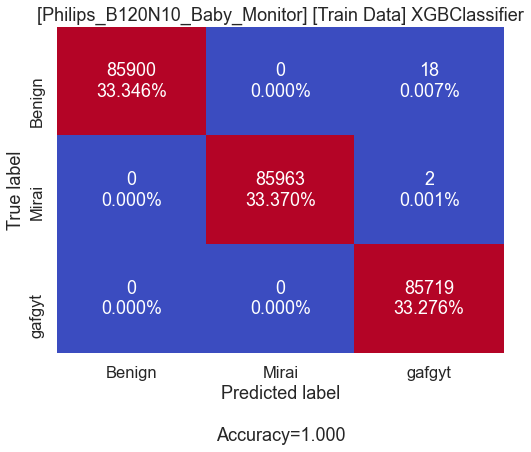


***** [Philips_B120N10_Baby_Monitor] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36744
           1      1.000     1.000     1.000     36729
           2      1.000     1.000     1.000     36929

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



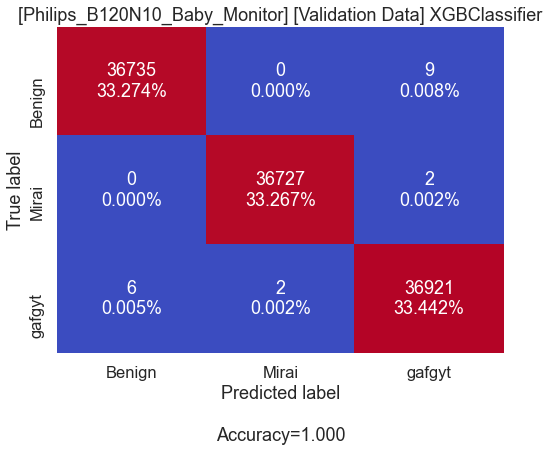


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     52578
           1      1.000     1.000     1.000     52546
           2      1.000     1.000     1.000     52592

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



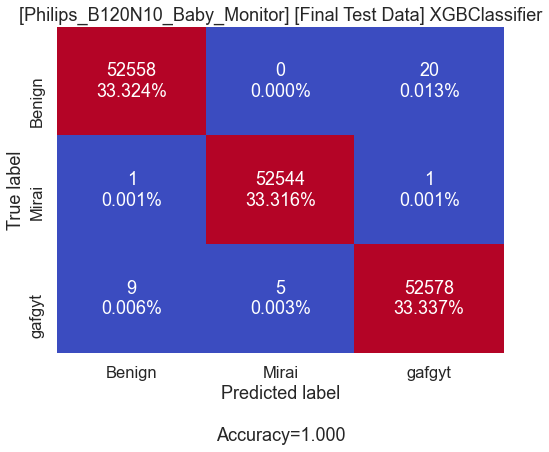

      Train:  Counter({1: 85963, 0: 85900, 2: 85739})
 Validation:  Counter({2: 36932, 0: 36741, 1: 36729})
       Test:  Counter({2: 52599, 0: 52568, 1: 52549})
      Label:  Counter({2: 52592, 0: 52578, 1: 52546})





In [22]:
# Read the pickle file or intantiate IoT_Device
B120N10_iot = read_device_pickle(PHILIPS_B120N10_BABYMONITOR)    
if B120N10_iot == None:
    # Instantiate class IoT_Device
    B120N10_iot = IoT_Device(PHILIPS_B120N10_BABYMONITOR)
    
    #Pickle the object
    write_device_pickle(B120N10_iot, PHILIPS_B120N10_BABYMONITOR)
model_factory(B120N10_iot)

# 5) Provision_PT_737E_Security_Camera

../../data_prep/Provision_PT_737E_Security_Camera.pkl
Ready to pickle the device ..  Shape: 186462

***** [Provision_PT_737E_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.609     0.993     0.755     30409
           1      0.994     0.991     0.992     30444
           2      0.959     0.360     0.523     30513

    accuracy                          0.781     91366
   macro avg      0.854     0.781     0.757     91366
weighted avg      0.854     0.781     0.757     91366



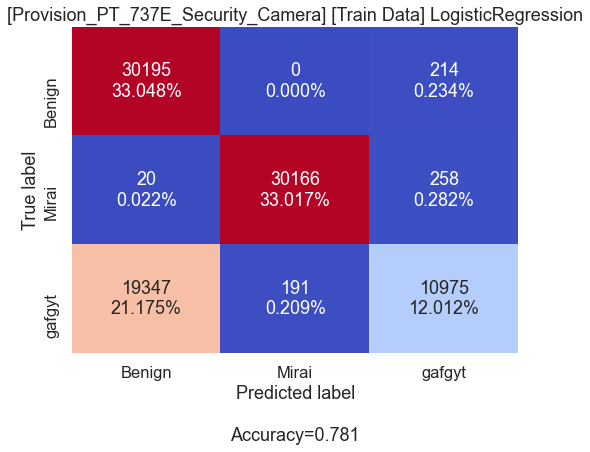


***** [Provision_PT_737E_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.612     0.993     0.757     13057
           1      0.993     0.992     0.993     13033
           2      0.961     0.365     0.529     13067

    accuracy                          0.783     39157
   macro avg      0.856     0.783     0.760     39157
weighted avg      0.855     0.783     0.760     39157



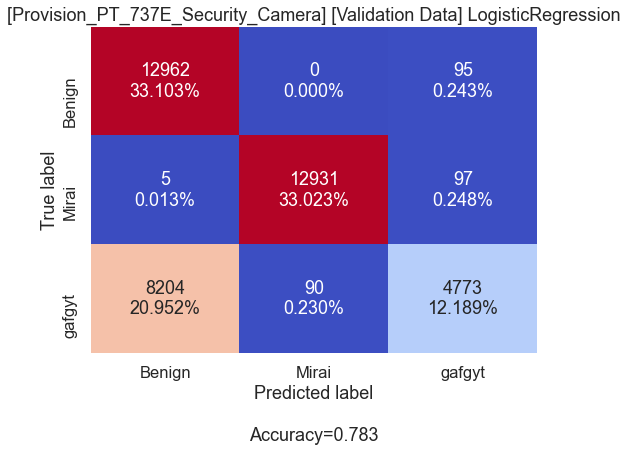


***** [Provision_PT_737E_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.611     0.994     0.757     18688
           1      0.994     0.990     0.992     18677
           2      0.960     0.358     0.521     18574

    accuracy                          0.782     55939
   macro avg      0.855     0.781     0.757     55939
weighted avg      0.855     0.782     0.757     55939



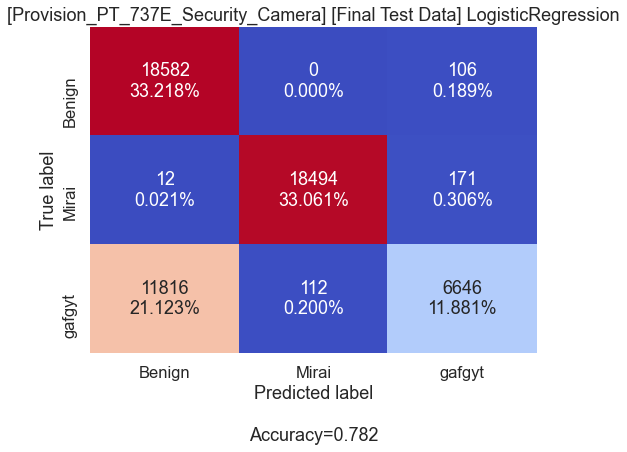

      Train:  Counter({0: 49562, 1: 30357, 2: 11447})
 Validation:  Counter({0: 21171, 1: 13021, 2: 4965})
       Test:  Counter({0: 30410, 1: 18606, 2: 6923})
      Label:  Counter({0: 30410, 1: 18606, 2: 6923})




***** [Provision_PT_737E_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     30409
           1      1.000     0.999     1.000     30444
           2      0.999     0.999     0.999     30513

    accuracy                          0.999     91366
   macro avg      0.999     0.999     0.999     91366
weighted avg      0.999     0.999     0.999     91366



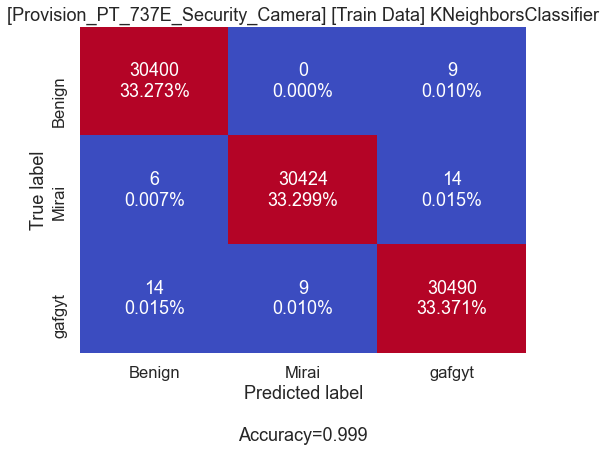


***** [Provision_PT_737E_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     13057
           1      1.000     1.000     1.000     13033
           2      0.999     0.999     0.999     13067

    accuracy                          1.000     39157
   macro avg      1.000     1.000     1.000     39157
weighted avg      1.000     1.000     1.000     39157



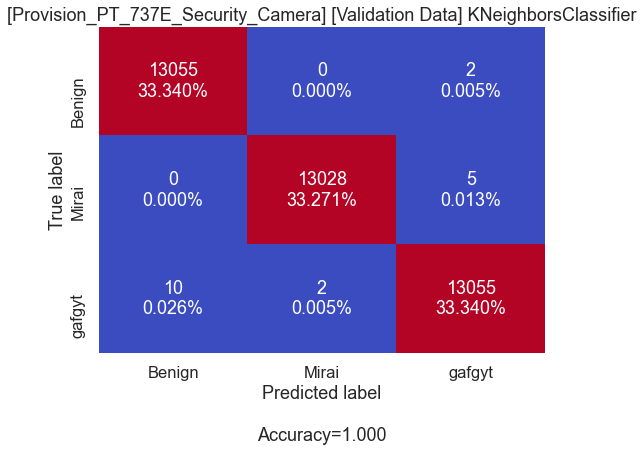


***** [Provision_PT_737E_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18688
           1      1.000     0.999     0.999     18677
           2      0.999     0.999     0.999     18574

    accuracy                          0.999     55939
   macro avg      0.999     0.999     0.999     55939
weighted avg      0.999     0.999     0.999     55939



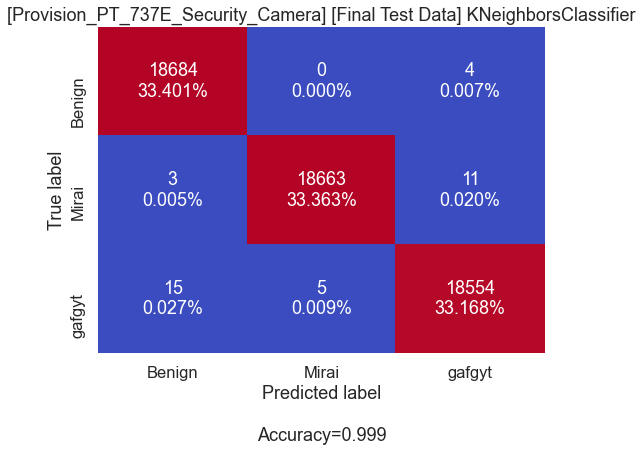

      Train:  Counter({2: 30513, 1: 30433, 0: 30420})
 Validation:  Counter({0: 13065, 2: 13062, 1: 13030})
       Test:  Counter({0: 18702, 1: 18668, 2: 18569})
      Label:  Counter({0: 18702, 1: 18668, 2: 18569})




***** [Provision_PT_737E_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     30409
           1      1.000     1.000     1.000     30444
           2      1.000     1.000     1.000     30513

    accuracy                          1.000     91366
   macro avg      1.000     1.000     1.000     91366
weighted avg      1.000     1.000     1.000     91366



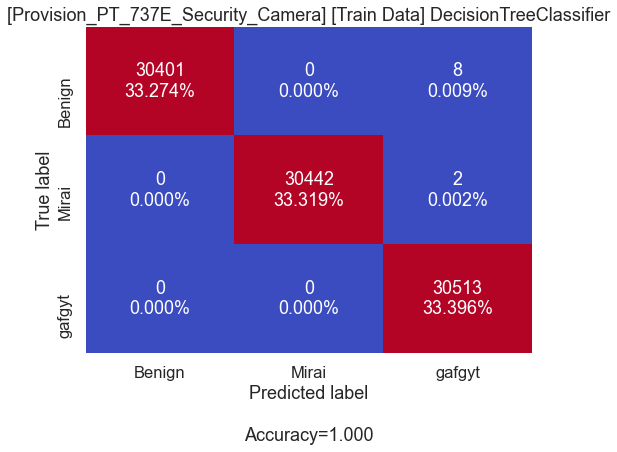


***** [Provision_PT_737E_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     13057
           1      1.000     1.000     1.000     13033
           2      1.000     0.999     0.999     13067

    accuracy                          1.000     39157
   macro avg      1.000     1.000     1.000     39157
weighted avg      1.000     1.000     1.000     39157



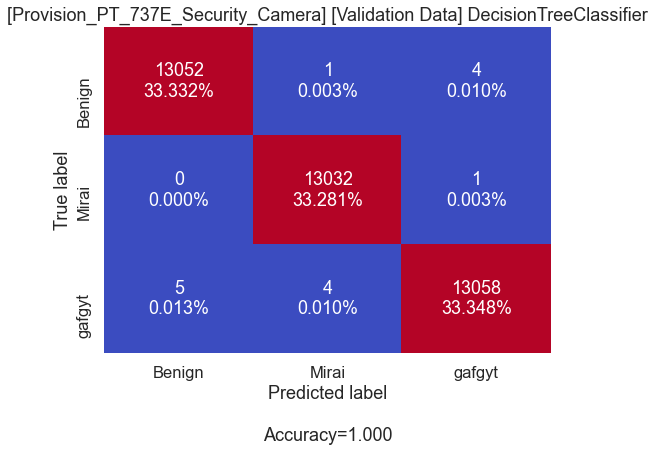


***** [Provision_PT_737E_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     18688
           1      1.000     1.000     1.000     18677
           2      0.999     0.999     0.999     18574

    accuracy                          0.999     55939
   macro avg      0.999     0.999     0.999     55939
weighted avg      0.999     0.999     0.999     55939



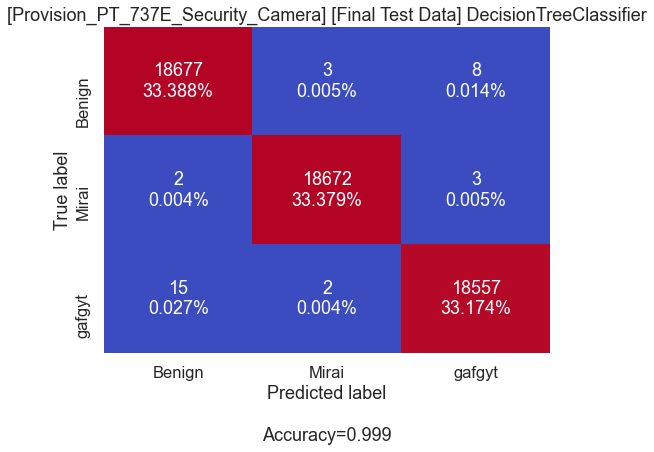

      Train:  Counter({2: 30523, 1: 30442, 0: 30401})
 Validation:  Counter({2: 13063, 0: 13057, 1: 13037})
       Test:  Counter({0: 18694, 1: 18677, 2: 18568})
      Label:  Counter({0: 18694, 1: 18677, 2: 18568})




***** [Provision_PT_737E_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     30409
           1      1.000     1.000     1.000     30444
           2      1.000     1.000     1.000     30513

    accuracy                          1.000     91366
   macro avg      1.000     1.000     1.000     91366
weighted avg      1.000     1.000     1.000     91366



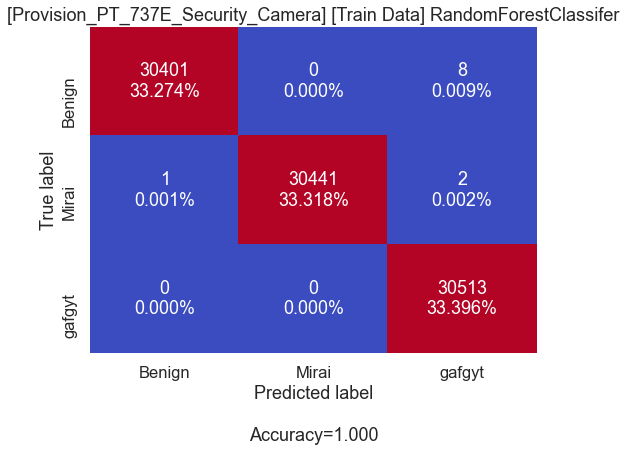


***** [Provision_PT_737E_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     13057
           1      1.000     1.000     1.000     13033
           2      1.000     0.999     0.999     13067

    accuracy                          1.000     39157
   macro avg      1.000     1.000     1.000     39157
weighted avg      1.000     1.000     1.000     39157



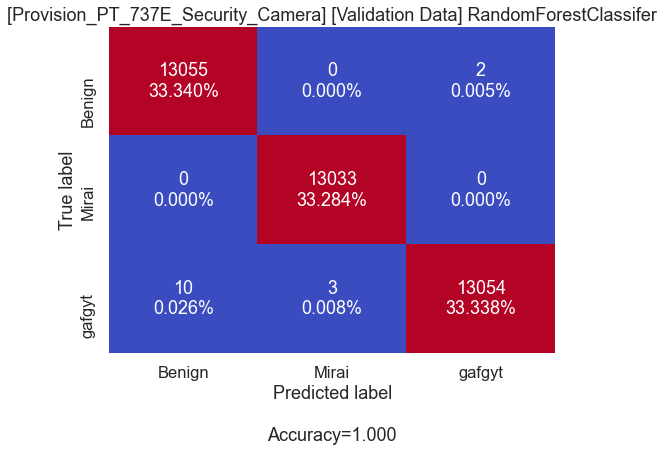


***** [Provision_PT_737E_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18688
           1      1.000     1.000     1.000     18677
           2      1.000     0.999     1.000     18574

    accuracy                          1.000     55939
   macro avg      1.000     1.000     1.000     55939
weighted avg      1.000     1.000     1.000     55939



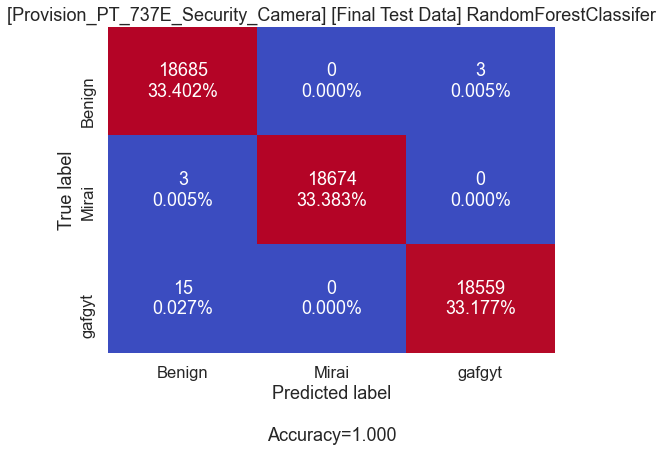

      Train:  Counter({2: 30523, 1: 30441, 0: 30402})
 Validation:  Counter({0: 13065, 2: 13056, 1: 13036})
       Test:  Counter({0: 18703, 1: 18674, 2: 18562})
      Label:  Counter({0: 18688, 1: 18677, 2: 18574})




***** [Provision_PT_737E_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     30409
           1      1.000     1.000     1.000     30444
           2      1.000     1.000     1.000     30513

    accuracy                          1.000     91366
   macro avg      1.000     1.000     1.000     91366
weighted avg      1.000     1.000     1.000     91366



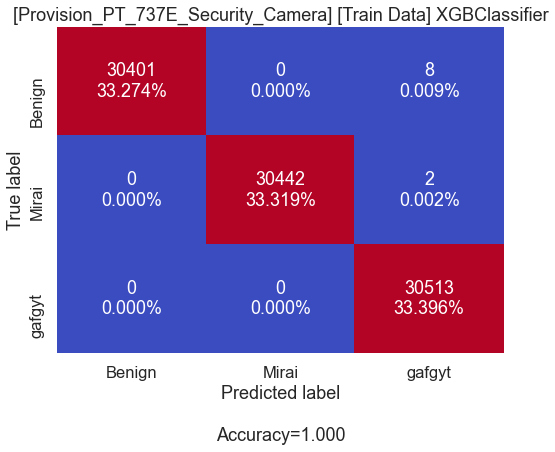


***** [Provision_PT_737E_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     13057
           1      1.000     1.000     1.000     13033
           2      1.000     0.999     0.999     13067

    accuracy                          1.000     39157
   macro avg      1.000     1.000     1.000     39157
weighted avg      1.000     1.000     1.000     39157



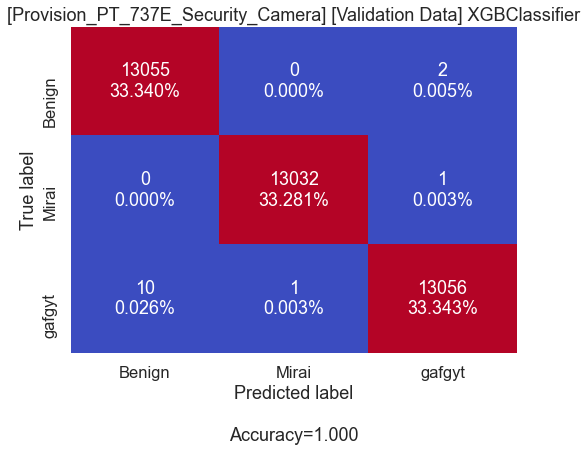


***** [Provision_PT_737E_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18688
           1      1.000     1.000     1.000     18677
           2      1.000     0.999     0.999     18574

    accuracy                          1.000     55939
   macro avg      1.000     1.000     1.000     55939
weighted avg      1.000     1.000     1.000     55939



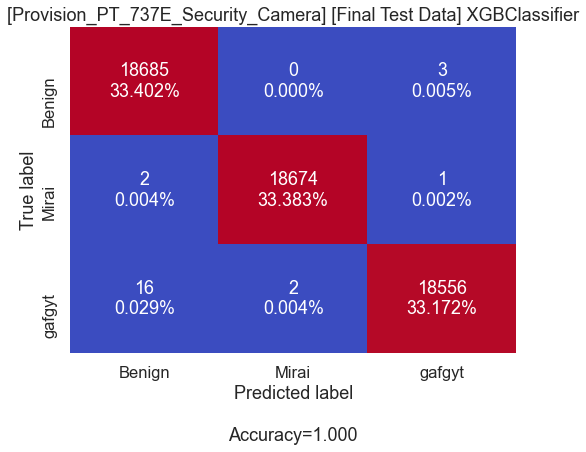

      Train:  Counter({2: 30523, 1: 30442, 0: 30401})
 Validation:  Counter({0: 13065, 2: 13059, 1: 13033})
       Test:  Counter({0: 18703, 1: 18676, 2: 18560})
      Label:  Counter({0: 18688, 1: 18677, 2: 18574})





In [23]:
# Read the pickle file or intantiate IoT_Device
PT737E_iot = read_device_pickle(PROVISION_737E_SECURITY_CAMERA)    
if PT737E_iot == None:
    # Instantiate class IoT_Device
    PT737E_iot = IoT_Device(PROVISION_737E_SECURITY_CAMERA)
    
    #Pickle the object
    write_device_pickle(PT737E_iot, PROVISION_737E_SECURITY_CAMERA)
model_factory(PT737E_iot)

# 6) Provision_PT_838_Security_Camera

../../data_prep/Provision_PT_838_Security_Camera.pkl
Ready to pickle the device ..  Shape: 295542

***** [Provision_PT_838_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.587     0.903     0.712     48104
           1      0.997     0.994     0.996     48278
           2      0.784     0.368     0.501     48433

    accuracy                          0.754    144815
   macro avg      0.790     0.755     0.736    144815
weighted avg      0.790     0.754     0.736    144815



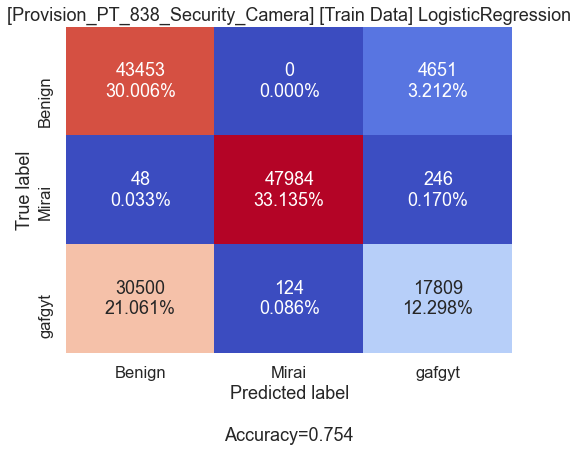


***** [Provision_PT_838_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.588     0.903     0.712     20639
           1      0.997     0.993     0.995     20689
           2      0.783     0.368     0.501     20736

    accuracy                          0.754     62064
   macro avg      0.789     0.755     0.736     62064
weighted avg      0.789     0.754     0.736     62064



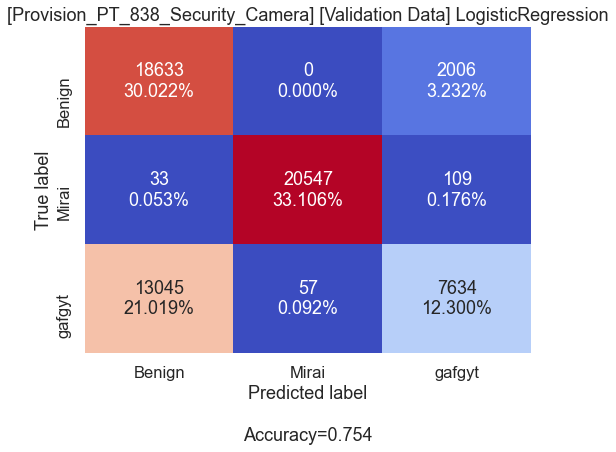


***** [Provision_PT_838_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.594     0.904     0.717     29771
           1      0.998     0.994     0.996     29547
           2      0.784     0.371     0.504     29345

    accuracy                          0.758     88663
   macro avg      0.792     0.756     0.739     88663
weighted avg      0.791     0.758     0.739     88663



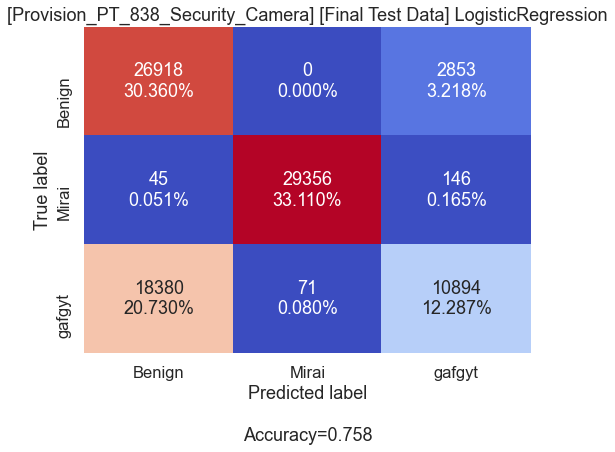

      Train:  Counter({0: 74001, 1: 48108, 2: 22706})
 Validation:  Counter({0: 31711, 1: 20604, 2: 9749})
       Test:  Counter({0: 45343, 1: 29427, 2: 13893})
      Label:  Counter({0: 45343, 1: 29427, 2: 13893})




***** [Provision_PT_838_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     48104
           1      1.000     1.000     1.000     48278
           2      1.000     0.999     1.000     48433

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



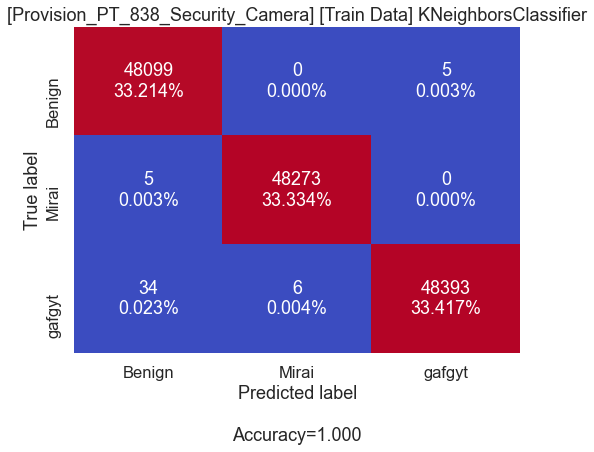


***** [Provision_PT_838_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     20639
           1      1.000     1.000     1.000     20689
           2      1.000     0.999     0.999     20736

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



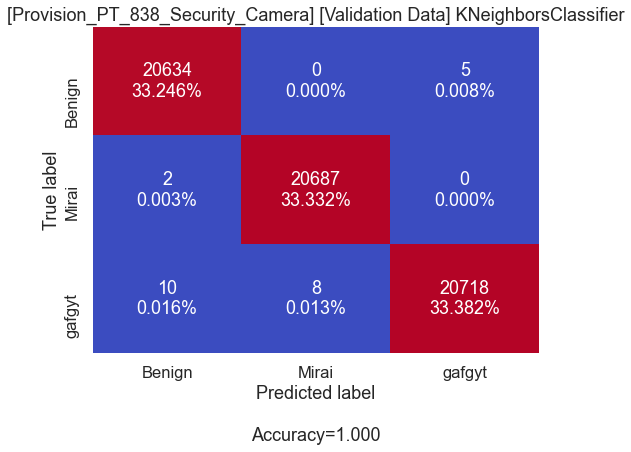


***** [Provision_PT_838_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     29771
           1      1.000     1.000     1.000     29547
           2      1.000     0.999     1.000     29345

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



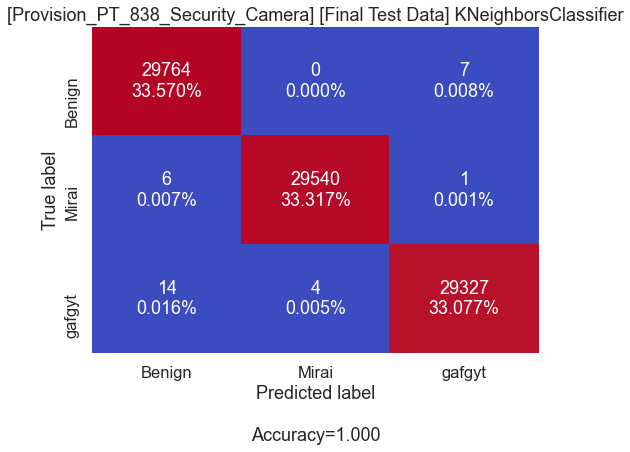

      Train:  Counter({2: 48398, 1: 48279, 0: 48138})
 Validation:  Counter({2: 20723, 1: 20695, 0: 20646})
       Test:  Counter({0: 29784, 1: 29544, 2: 29335})
      Label:  Counter({0: 29784, 1: 29544, 2: 29335})




***** [Provision_PT_838_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     48104
           1      1.000     1.000     1.000     48278
           2      1.000     1.000     1.000     48433

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



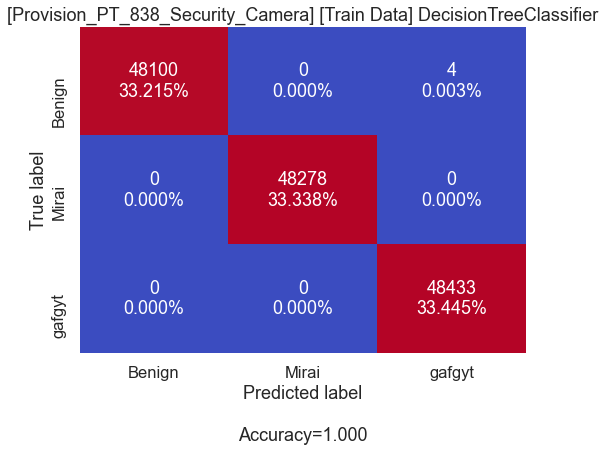


***** [Provision_PT_838_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20639
           1      1.000     1.000     1.000     20689
           2      1.000     1.000     1.000     20736

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



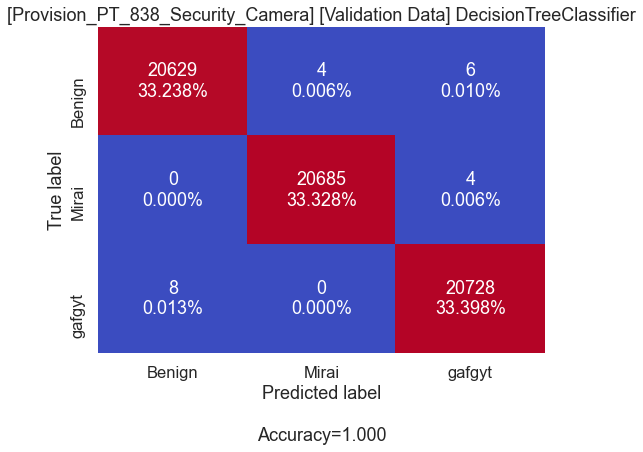


***** [Provision_PT_838_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     29771
           1      1.000     1.000     1.000     29547
           2      0.999     1.000     1.000     29345

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



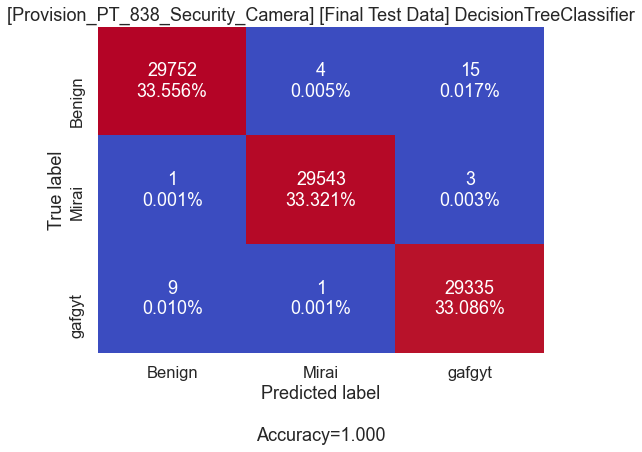

      Train:  Counter({2: 48437, 1: 48278, 0: 48100})
 Validation:  Counter({2: 20738, 1: 20689, 0: 20637})
       Test:  Counter({0: 29762, 1: 29548, 2: 29353})
      Label:  Counter({0: 29762, 1: 29548, 2: 29353})




***** [Provision_PT_838_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     48104
           1      1.000     1.000     1.000     48278
           2      1.000     1.000     1.000     48433

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



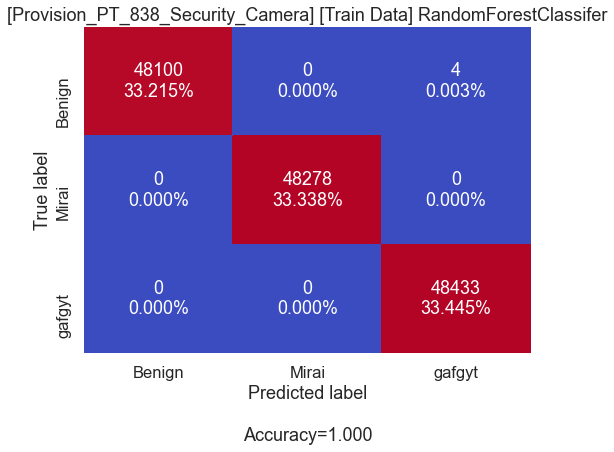


***** [Provision_PT_838_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     20639
           1      1.000     1.000     1.000     20689
           2      1.000     0.999     0.999     20736

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



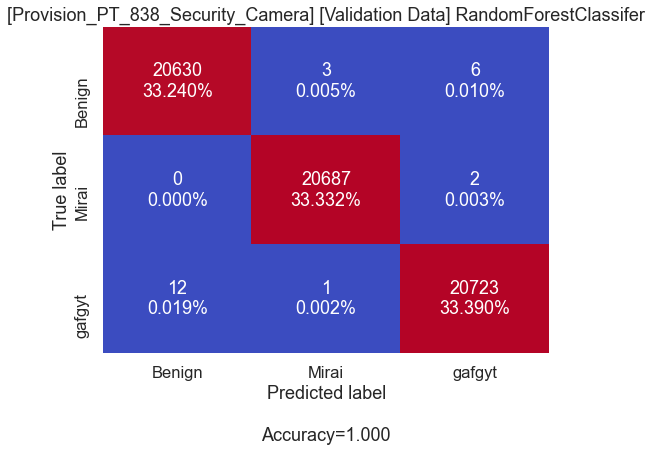


***** [Provision_PT_838_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     29771
           1      1.000     1.000     1.000     29547
           2      1.000     0.999     1.000     29345

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



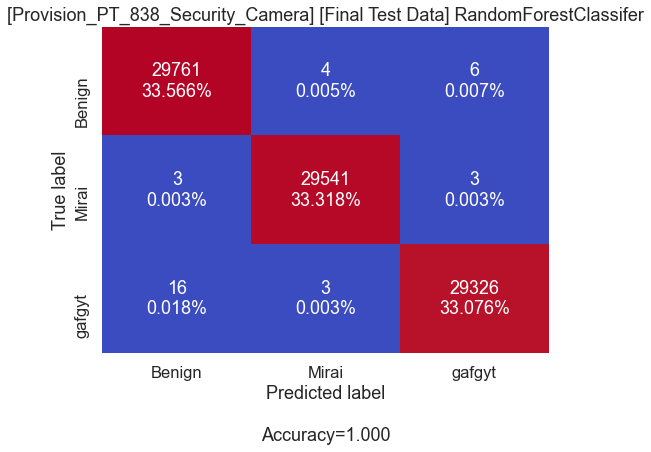

      Train:  Counter({2: 48437, 1: 48278, 0: 48100})
 Validation:  Counter({2: 20731, 1: 20691, 0: 20642})
       Test:  Counter({0: 29780, 1: 29548, 2: 29335})
      Label:  Counter({0: 29771, 1: 29547, 2: 29345})




***** [Provision_PT_838_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     48104
           1      1.000     1.000     1.000     48278
           2      1.000     1.000     1.000     48433

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



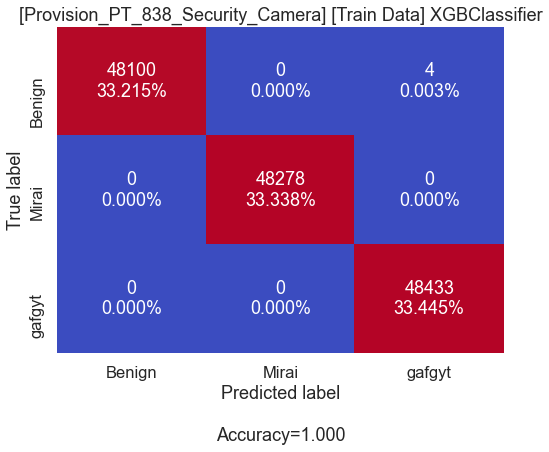


***** [Provision_PT_838_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20639
           1      1.000     1.000     1.000     20689
           2      1.000     1.000     1.000     20736

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



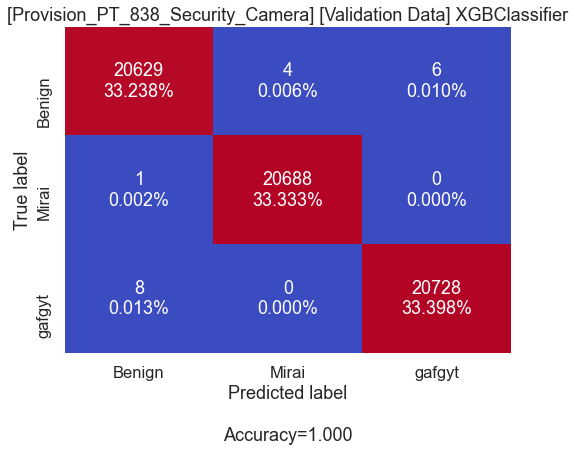


***** [Provision_PT_838_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29771
           1      1.000     1.000     1.000     29547
           2      1.000     1.000     1.000     29345

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



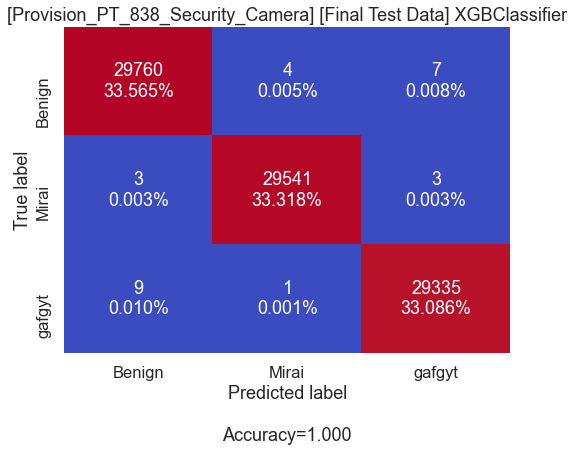

      Train:  Counter({2: 48437, 1: 48278, 0: 48100})
 Validation:  Counter({2: 20734, 1: 20692, 0: 20638})
       Test:  Counter({0: 29772, 1: 29546, 2: 29345})
      Label:  Counter({0: 29771, 1: 29547, 2: 29345})





In [24]:
# Read the pickle file or intantiate IoT_Device
PT838_iot = read_device_pickle(PROVISION_838_SECURITY_CAMERA )    
if PT838_iot == None:
    # Instantiate class IoT_Device
    PT838_iot = IoT_Device(PROVISION_838_SECURITY_CAMERA )
    
    #Pickle the object
    write_device_pickle(PT838_iot, PROVISION_838_SECURITY_CAMERA )
model_factory(PT838_iot)

SimpleHome_XCS7_1002_WHT_Security_Camera# 7) Samsung_SNH_1011_N_Webcam

# 7) Samsung SNH-1011N Webcam

../../data_prep/Samsung_SNH_1011_N_Webcam.pkl
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/ack.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/scan.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/syn.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/udp.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/udpplain.csv
Ready to pickle the device ..  Shape: 104300

***** [Samsung_SNH_1011_N_Webcam] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.597     0.961     0.737     25510
           2      0.901     0.355     0.509     25597

    accuracy                          0.657     51107
   macro avg      0.749     0.658     0.623     51107
weighted avg      0.750     0.657     0.623     51107



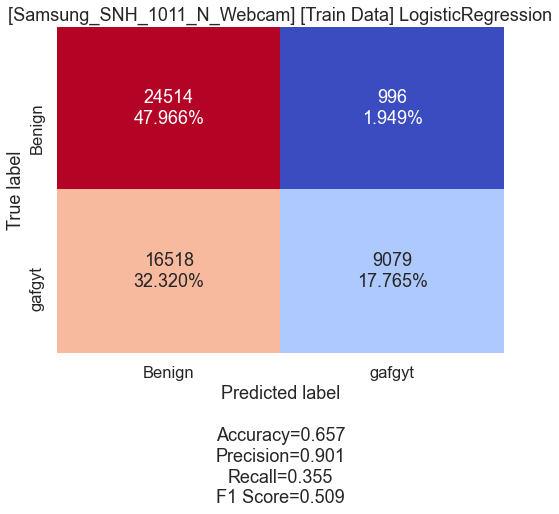


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.599     0.964     0.739     11009
           2      0.905     0.349     0.504     10894

    accuracy                          0.658     21903
   macro avg      0.752     0.656     0.621     21903
weighted avg      0.751     0.658     0.622     21903



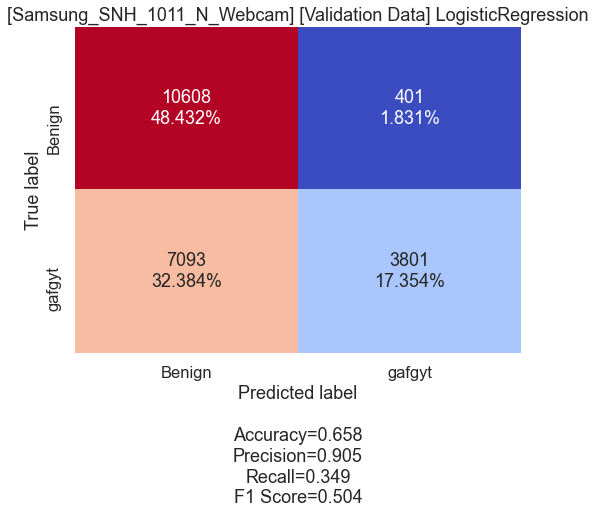


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.598     0.962     0.738     15631
           2      0.904     0.355     0.510     15659

    accuracy                          0.659     31290
   macro avg      0.751     0.659     0.624     31290
weighted avg      0.752     0.659     0.624     31290



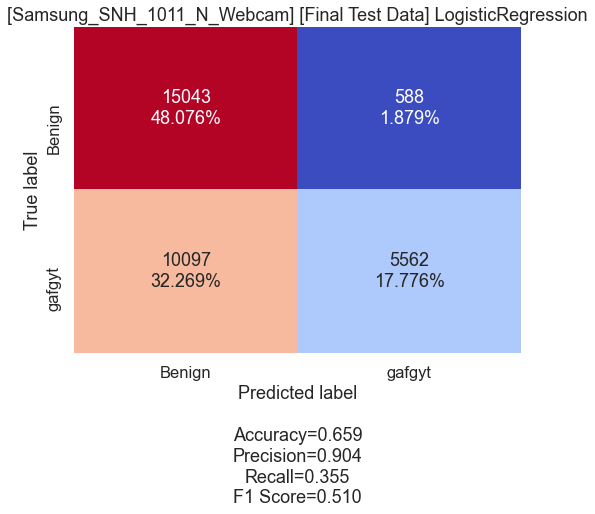

      Train:  Counter({0: 41032, 2: 10075})
 Validation:  Counter({0: 17701, 2: 4202})
       Test:  Counter({0: 25140, 2: 6150})
      Label:  Counter({0: 25140, 2: 6150})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     25510
           2      1.000     0.999     0.999     25597

    accuracy                          0.999     51107
   macro avg      0.999     0.999     0.999     51107
weighted avg      0.999     0.999     0.999     51107



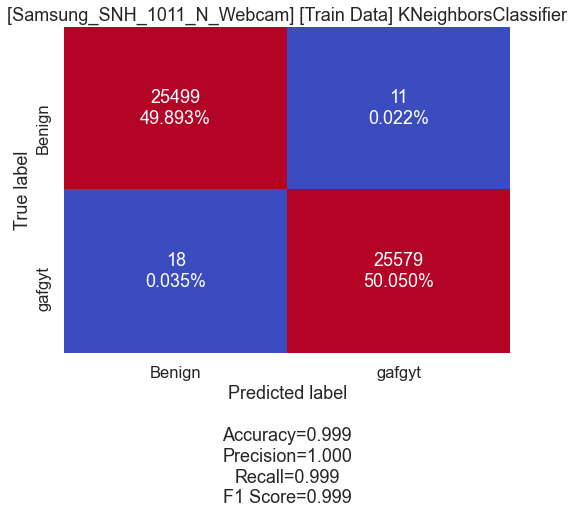


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     11009
           2      1.000     1.000     1.000     10894

    accuracy                          1.000     21903
   macro avg      1.000     1.000     1.000     21903
weighted avg      1.000     1.000     1.000     21903



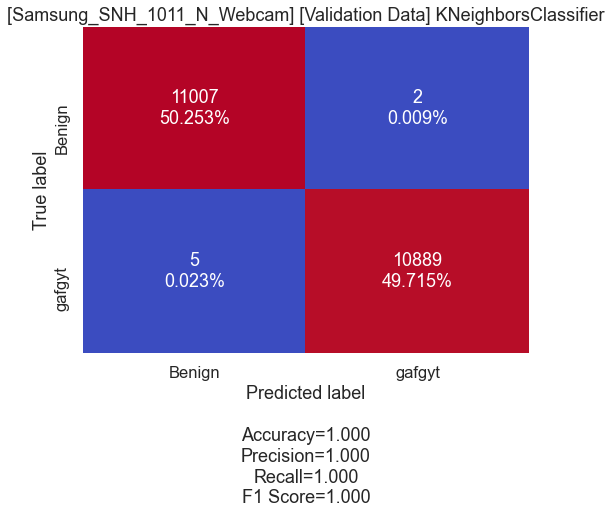


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     15631
           2      1.000     1.000     1.000     15659

    accuracy                          1.000     31290
   macro avg      1.000     1.000     1.000     31290
weighted avg      1.000     1.000     1.000     31290



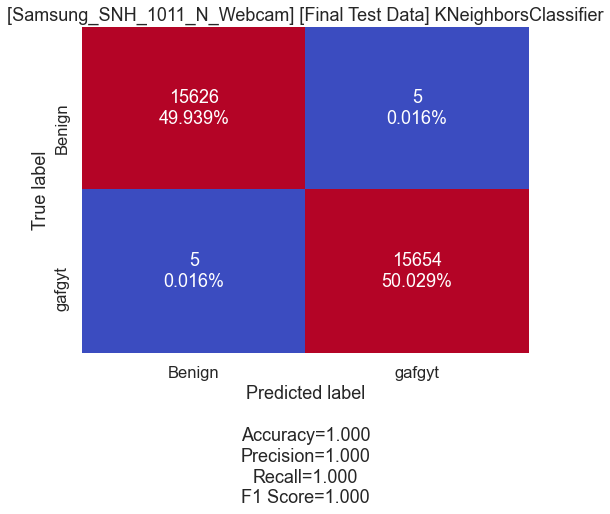

      Train:  Counter({2: 25590, 0: 25517})
 Validation:  Counter({0: 11012, 2: 10891})
       Test:  Counter({2: 15659, 0: 15631})
      Label:  Counter({2: 15659, 0: 15631})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25510
           2      1.000     1.000     1.000     25597

    accuracy                          1.000     51107
   macro avg      1.000     1.000     1.000     51107
weighted avg      1.000     1.000     1.000     51107



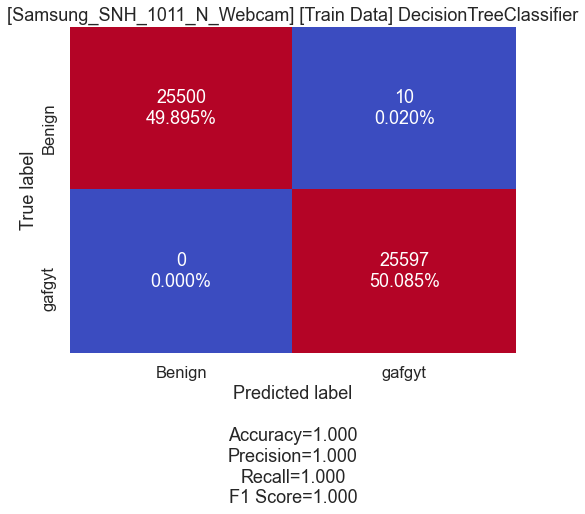


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999     11009
           2      0.999     1.000     0.999     10894

    accuracy                          0.999     21903
   macro avg      0.999     0.999     0.999     21903
weighted avg      0.999     0.999     0.999     21903



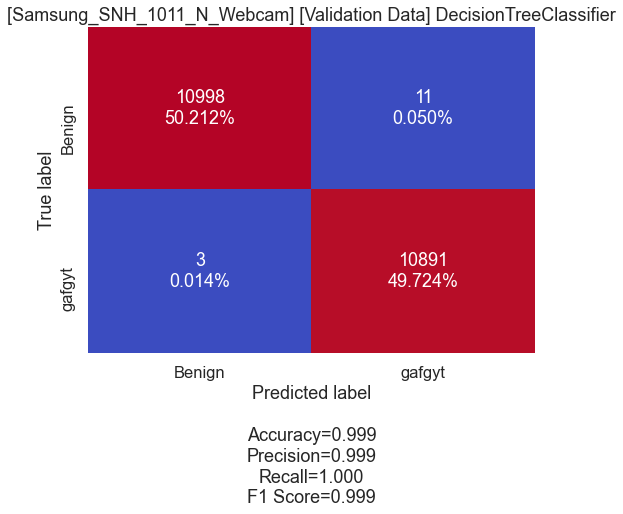


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999     15631
           2      0.999     1.000     0.999     15659

    accuracy                          0.999     31290
   macro avg      0.999     0.999     0.999     31290
weighted avg      0.999     0.999     0.999     31290



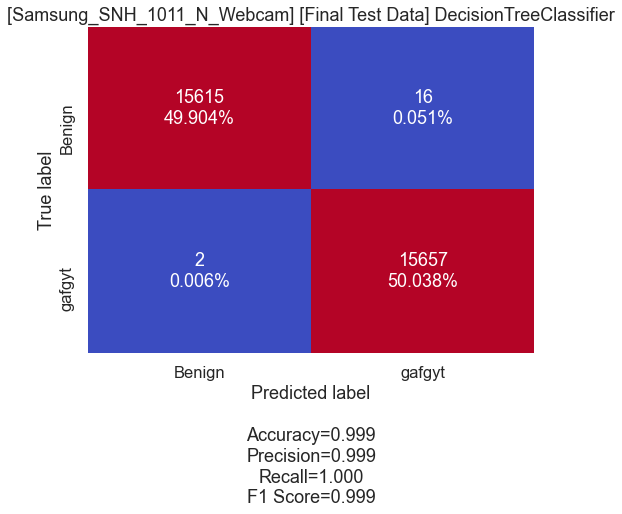

      Train:  Counter({2: 25607, 0: 25500})
 Validation:  Counter({0: 11001, 2: 10902})
       Test:  Counter({2: 15673, 0: 15617})
      Label:  Counter({2: 15673, 0: 15617})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25510
           2      1.000     1.000     1.000     25597

    accuracy                          1.000     51107
   macro avg      1.000     1.000     1.000     51107
weighted avg      1.000     1.000     1.000     51107



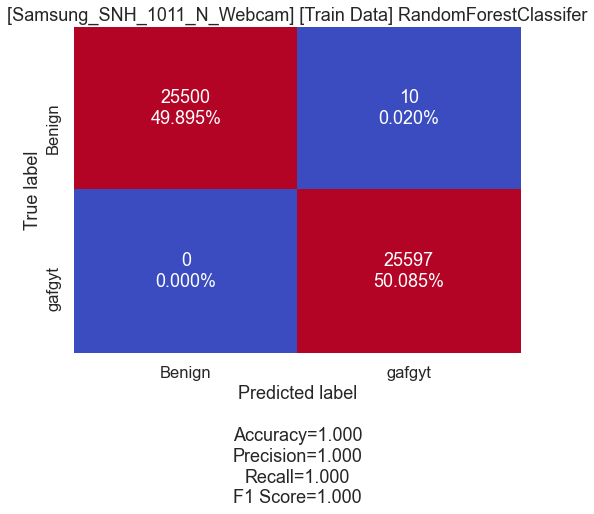


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     11009
           2      1.000     1.000     1.000     10894

    accuracy                          1.000     21903
   macro avg      1.000     1.000     1.000     21903
weighted avg      1.000     1.000     1.000     21903



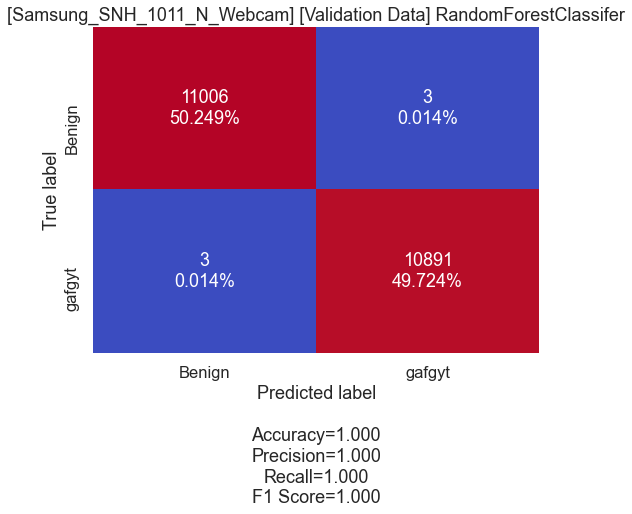


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     15631
           2      1.000     1.000     1.000     15659

    accuracy                          1.000     31290
   macro avg      1.000     1.000     1.000     31290
weighted avg      1.000     1.000     1.000     31290



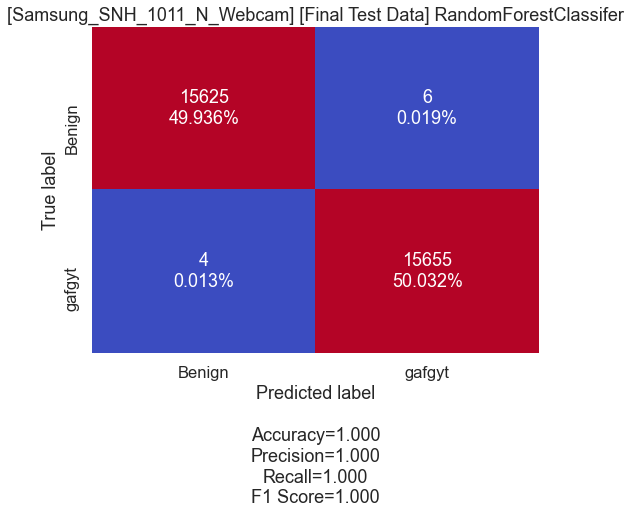

      Train:  Counter({2: 25607, 0: 25500})
 Validation:  Counter({0: 11009, 2: 10894})
       Test:  Counter({2: 15661, 0: 15629})
      Label:  Counter({2: 15659, 0: 15631})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25510
           2      1.000     1.000     1.000     25597

    accuracy                          1.000     51107
   macro avg      1.000     1.000     1.000     51107
weighted avg      1.000     1.000     1.000     51107



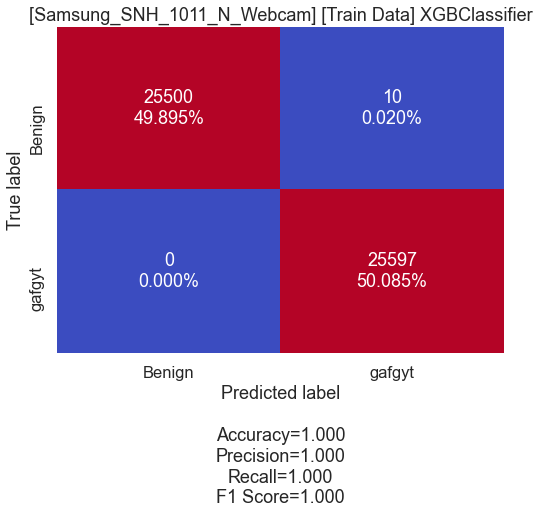


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     11009
           2      1.000     1.000     1.000     10894

    accuracy                          1.000     21903
   macro avg      1.000     1.000     1.000     21903
weighted avg      1.000     1.000     1.000     21903



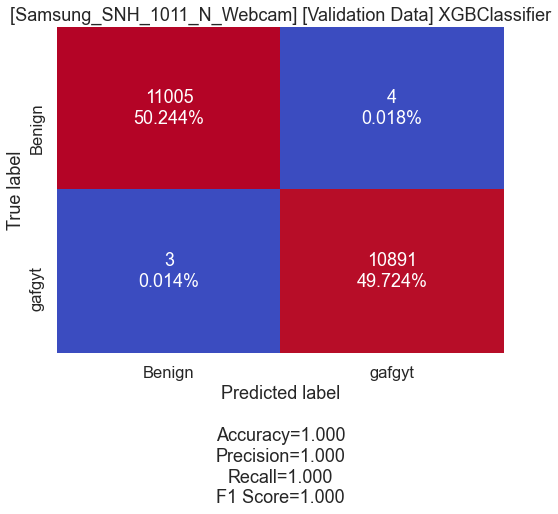


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     15631
           2      1.000     1.000     1.000     15659

    accuracy                          1.000     31290
   macro avg      1.000     1.000     1.000     31290
weighted avg      1.000     1.000     1.000     31290



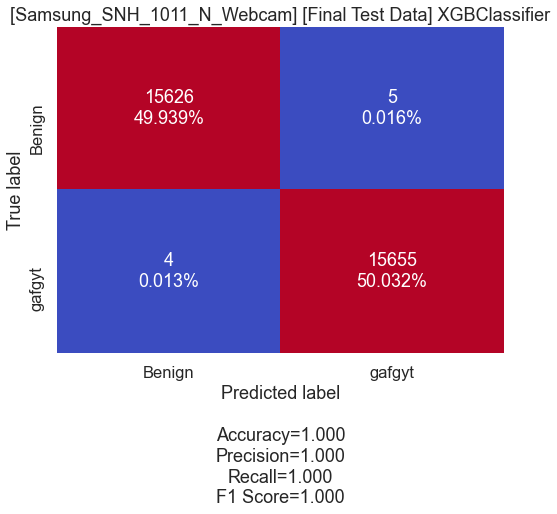

      Train:  Counter({2: 25607, 0: 25500})
 Validation:  Counter({0: 11008, 2: 10895})
       Test:  Counter({2: 15660, 0: 15630})
      Label:  Counter({2: 15659, 0: 15631})





In [25]:
# Read the pickle file or intantiate IoT_Device
SAMSUNG_iot = read_device_pickle(SAMSUNG_1011N_WEBCAM )    
if SAMSUNG_iot == None:
    # Instantiate class IoT_Device
    SAMSUNG_iot = IoT_Device(SAMSUNG_1011N_WEBCAM )
    
    #Pickle the object
    write_device_pickle(SAMSUNG_iot, SAMSUNG_1011N_WEBCAM )
model_factory(SAMSUNG_iot)

# 8) SimpleHome XCS7-1002WHT Security Camera

../../data_prep/SimpleHome_XCS7_1002_WHT_Security_Camera.pkl
Ready to pickle the device ..  Shape: 139755

***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.610     0.994     0.756     22849
           1      0.997     0.996     0.997     22827
           2      0.976     0.361     0.527     22803

    accuracy                          0.784     68479
   macro avg      0.861     0.784     0.760     68479
weighted avg      0.861     0.784     0.760     68479



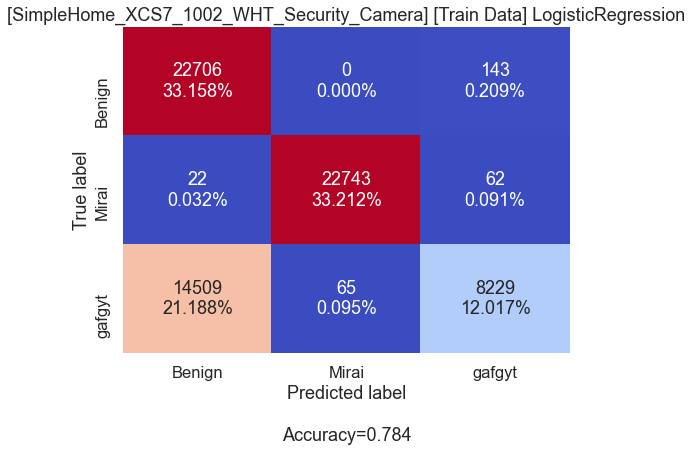


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.608     0.993     0.754      9724
           1      0.996     0.998     0.997      9839
           2      0.976     0.362     0.528      9786

    accuracy                          0.784     29349
   macro avg      0.860     0.784     0.760     29349
weighted avg      0.861     0.784     0.760     29349



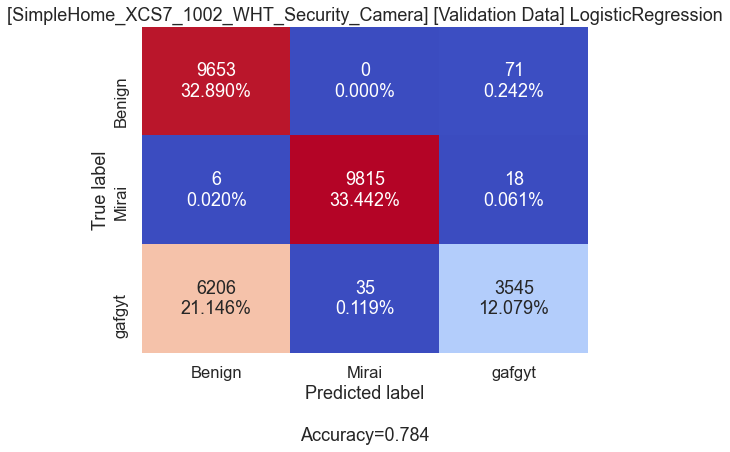


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.609     0.994     0.756     14012
           1      0.997     0.996     0.997     13919
           2      0.976     0.360     0.526     13996

    accuracy                          0.783     41927
   macro avg      0.861     0.784     0.760     41927
weighted avg      0.861     0.783     0.759     41927



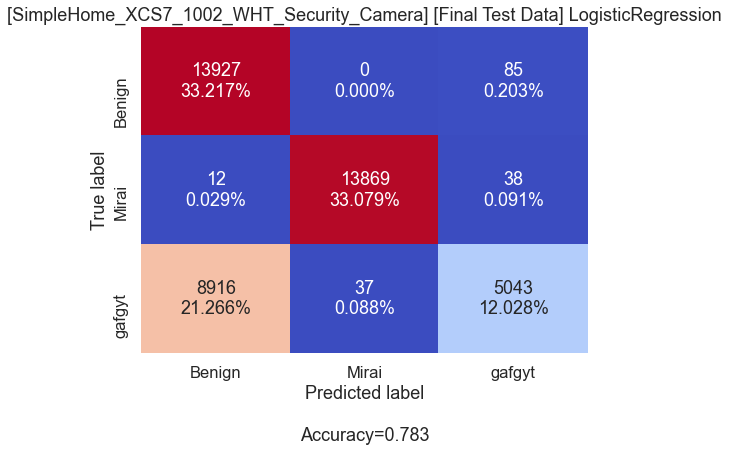

      Train:  Counter({0: 37237, 1: 22808, 2: 8434})
 Validation:  Counter({0: 15865, 1: 9850, 2: 3634})
       Test:  Counter({0: 22855, 1: 13906, 2: 5166})
      Label:  Counter({0: 22855, 1: 13906, 2: 5166})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     22849
           1      0.999     1.000     1.000     22827
           2      1.000     0.999     0.999     22803

    accuracy                          0.999     68479
   macro avg      0.999     0.999     0.999     68479
weighted avg      0.999     0.999     0.999     68479



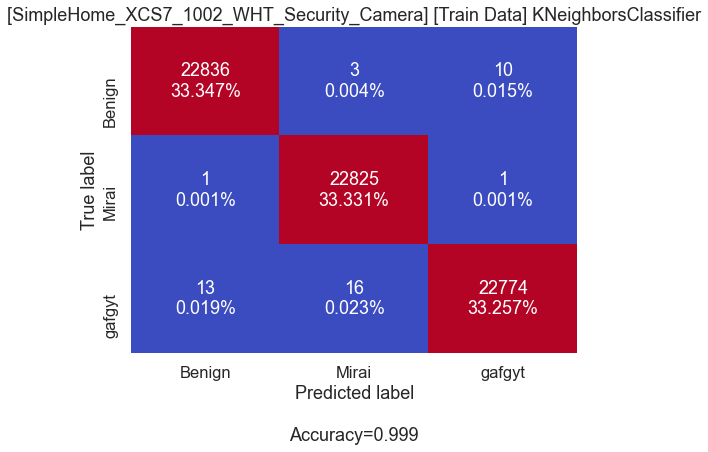


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      9724
           1      0.998     1.000     0.999      9839
           2      1.000     0.997     0.999      9786

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



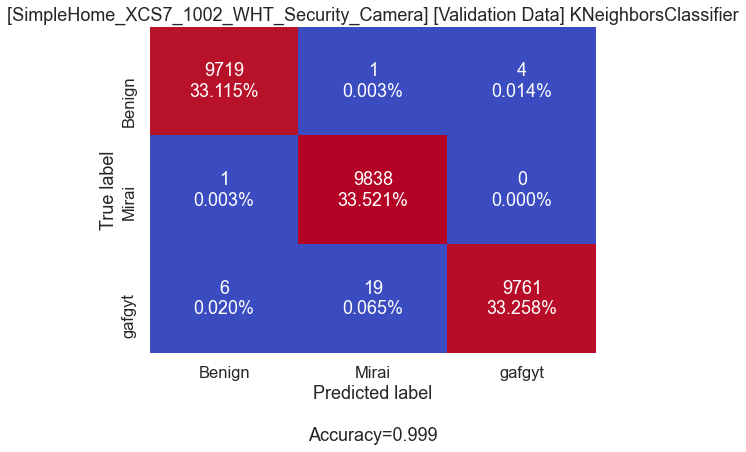


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     14012
           1      0.999     1.000     0.999     13919
           2      0.999     0.999     0.999     13996

    accuracy                          0.999     41927
   macro avg      0.999     0.999     0.999     41927
weighted avg      0.999     0.999     0.999     41927



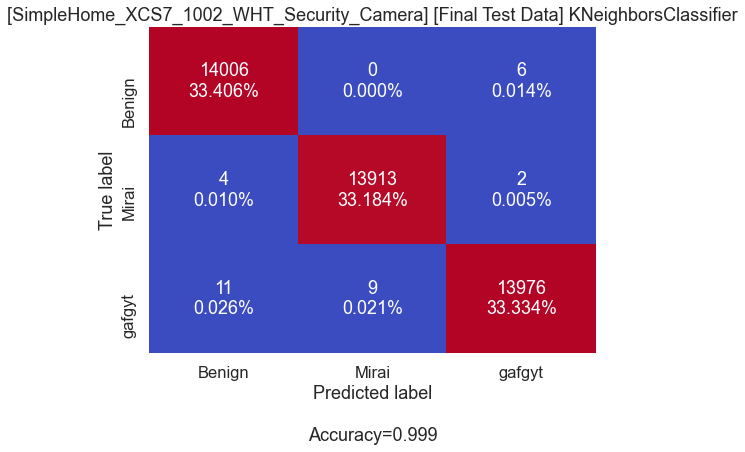

      Train:  Counter({0: 22850, 1: 22844, 2: 22785})
 Validation:  Counter({1: 9858, 2: 9765, 0: 9726})
       Test:  Counter({0: 14021, 2: 13984, 1: 13922})
      Label:  Counter({0: 14021, 2: 13984, 1: 13922})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     22849
           1      1.000     1.000     1.000     22827
           2      1.000     1.000     1.000     22803

    accuracy                          1.000     68479
   macro avg      1.000     1.000     1.000     68479
weighted avg      1.000     1.000     1.000     68479



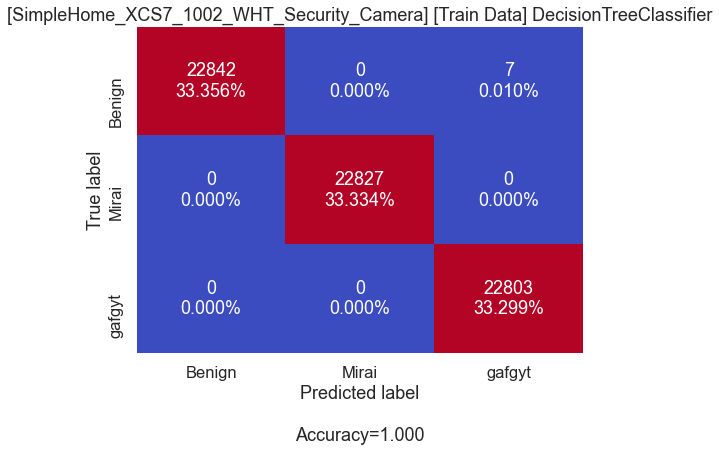


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      9724
           1      0.999     0.999     0.999      9839
           2      0.999     0.998     0.999      9786

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



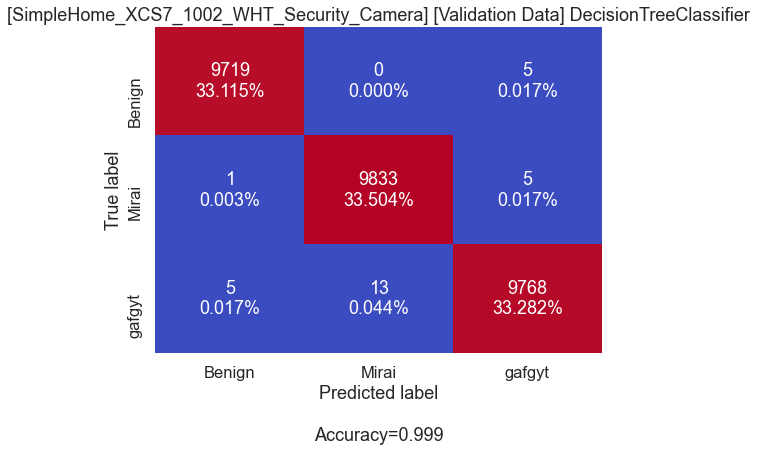


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     14012
           1      0.999     1.000     0.999     13919
           2      0.999     0.999     0.999     13996

    accuracy                          0.999     41927
   macro avg      0.999     0.999     0.999     41927
weighted avg      0.999     0.999     0.999     41927



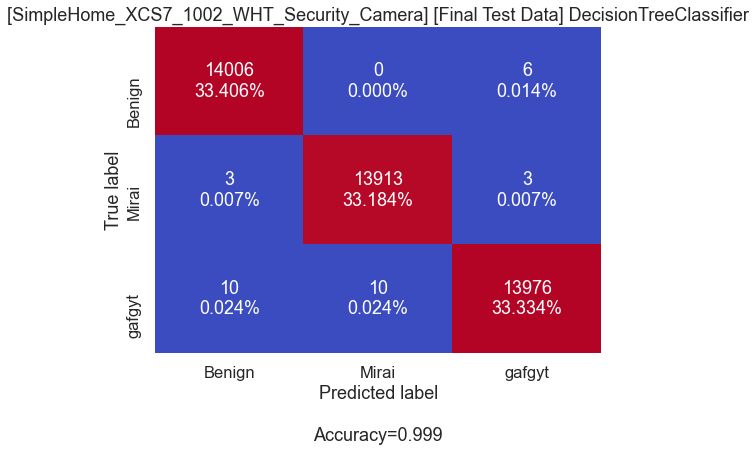

      Train:  Counter({0: 22842, 1: 22827, 2: 22810})
 Validation:  Counter({1: 9846, 2: 9778, 0: 9725})
       Test:  Counter({0: 14019, 2: 13985, 1: 13923})
      Label:  Counter({0: 14019, 2: 13985, 1: 13923})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     22849
           1      1.000     1.000     1.000     22827
           2      1.000     1.000     1.000     22803

    accuracy                          1.000     68479
   macro avg      1.000     1.000     1.000     68479
weighted avg      1.000     1.000     1.000     68479



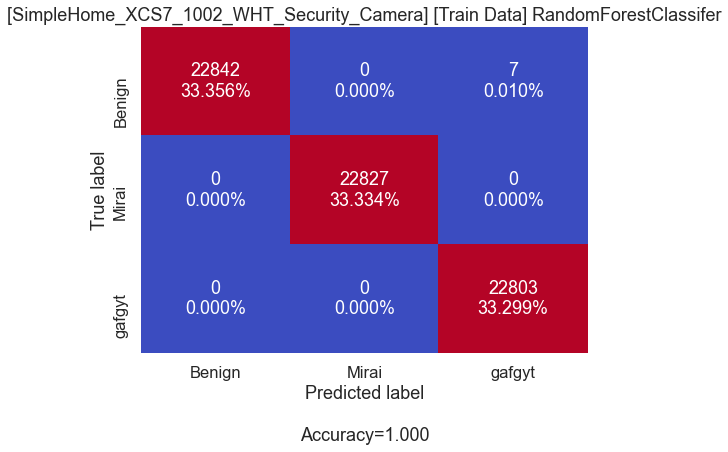


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999      9724
           1      0.999     1.000     0.999      9839
           2      1.000     0.998     0.999      9786

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



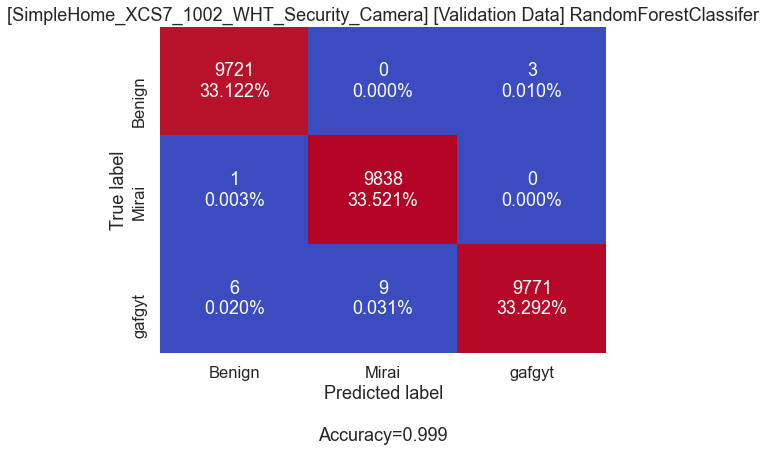


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     14012
           1      1.000     1.000     1.000     13919
           2      1.000     0.999     0.999     13996

    accuracy                          0.999     41927
   macro avg      0.999     0.999     0.999     41927
weighted avg      0.999     0.999     0.999     41927



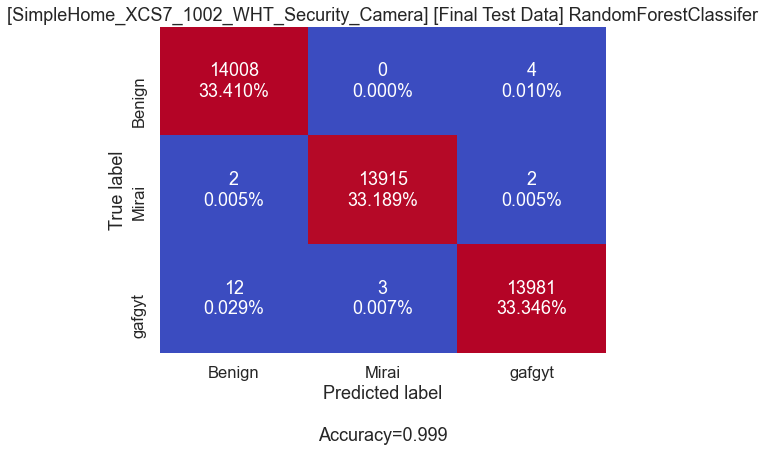

      Train:  Counter({0: 22842, 1: 22827, 2: 22810})
 Validation:  Counter({1: 9847, 2: 9774, 0: 9728})
       Test:  Counter({0: 14022, 2: 13987, 1: 13918})
      Label:  Counter({0: 14012, 2: 13996, 1: 13919})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     22849
           1      1.000     1.000     1.000     22827
           2      1.000     1.000     1.000     22803

    accuracy                          1.000     68479
   macro avg      1.000     1.000     1.000     68479
weighted avg      1.000     1.000     1.000     68479



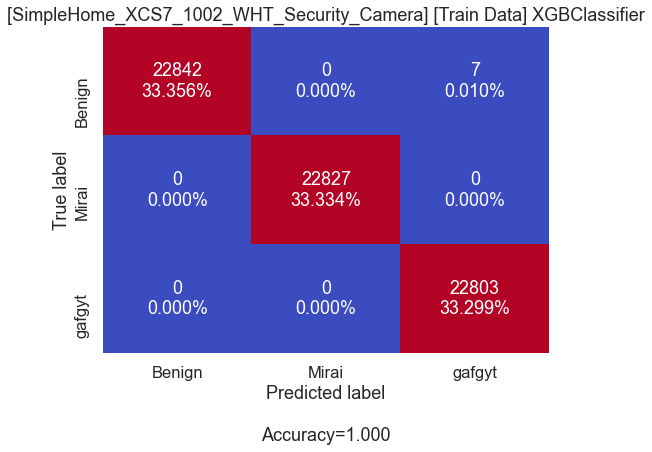


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999      9724
           1      0.999     1.000     0.999      9839
           2      1.000     0.998     0.999      9786

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



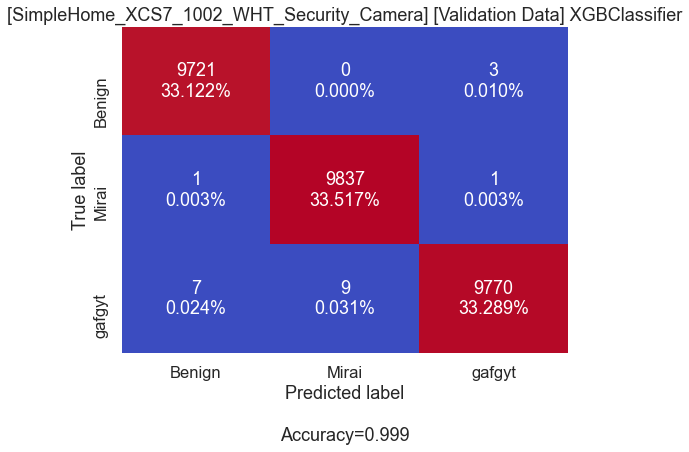


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     14012
           1      1.000     1.000     1.000     13919
           2      1.000     0.999     0.999     13996

    accuracy                          1.000     41927
   macro avg      1.000     1.000     1.000     41927
weighted avg      1.000     1.000     1.000     41927



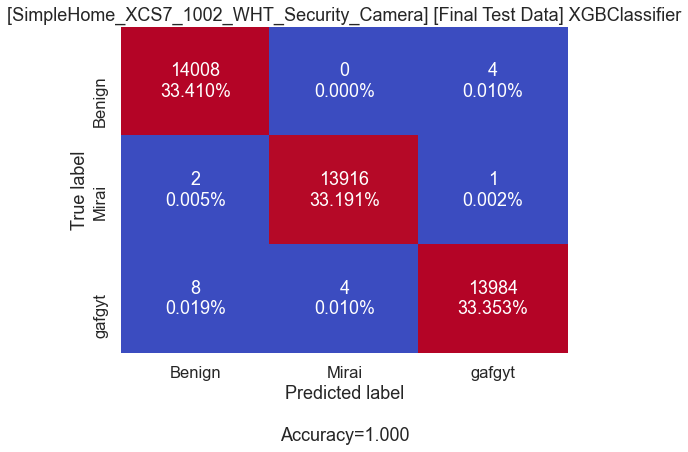

      Train:  Counter({0: 22842, 1: 22827, 2: 22810})
 Validation:  Counter({1: 9846, 2: 9774, 0: 9729})
       Test:  Counter({0: 14018, 2: 13989, 1: 13920})
      Label:  Counter({0: 14012, 2: 13996, 1: 13919})





In [26]:
# Read the pickle file or intantiate IoT_Device
XCS7_1002_iot = read_device_pickle(SIMPLEHOME_1002_SECURITY_CAMERA )    
if XCS7_1002_iot == None:
    # Instantiate class IoT_Device
    XCS7_1002_iot = IoT_Device(SIMPLEHOME_1002_SECURITY_CAMERA )
    
    #Pickle the object
    write_device_pickle(XCS7_1002_iot, SIMPLEHOME_1002_SECURITY_CAMERA )
model_factory(XCS7_1002_iot)

# 9) SimpleHome XCS7-1003WHT Security Camera

../../data_prep/SimpleHome_XCS7_1003_WHT_Security_Camera.pkl
Ready to pickle the device ..  Shape: 58584

***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.612     1.000     0.760      9639
           1      0.995     0.994     0.995      9517
           2      0.986     0.356     0.524      9549

    accuracy                          0.784     28705
   macro avg      0.864     0.784     0.759     28705
weighted avg      0.863     0.784     0.759     28705



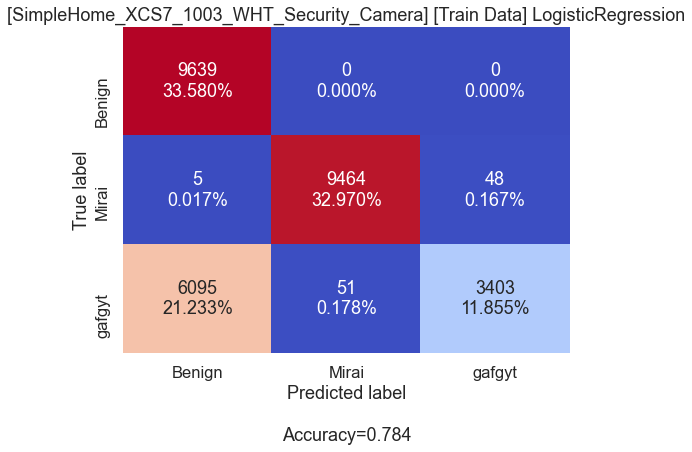


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.608     1.000     0.756      4070
           1      0.995     0.996     0.995      4082
           2      0.988     0.364     0.532      4151

    accuracy                          0.784     12303
   macro avg      0.864     0.786     0.761     12303
weighted avg      0.865     0.784     0.760     12303



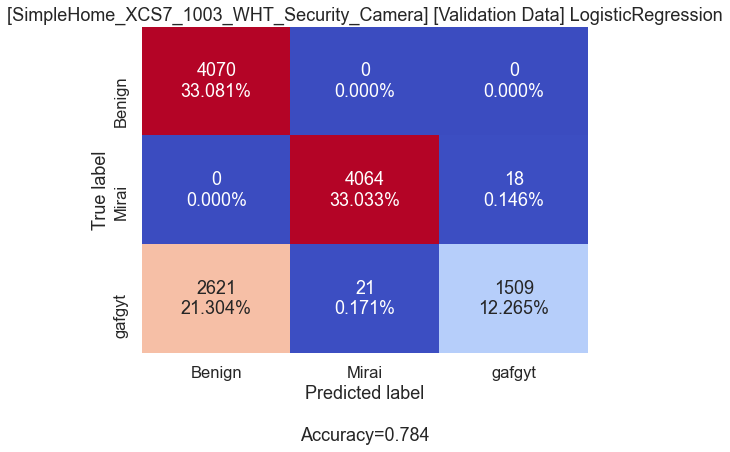


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.613     1.000     0.760      5819
           1      0.994     0.991     0.993      5929
           2      0.977     0.365     0.531      5828

    accuracy                          0.786     17576
   macro avg      0.862     0.785     0.761     17576
weighted avg      0.863     0.786     0.763     17576



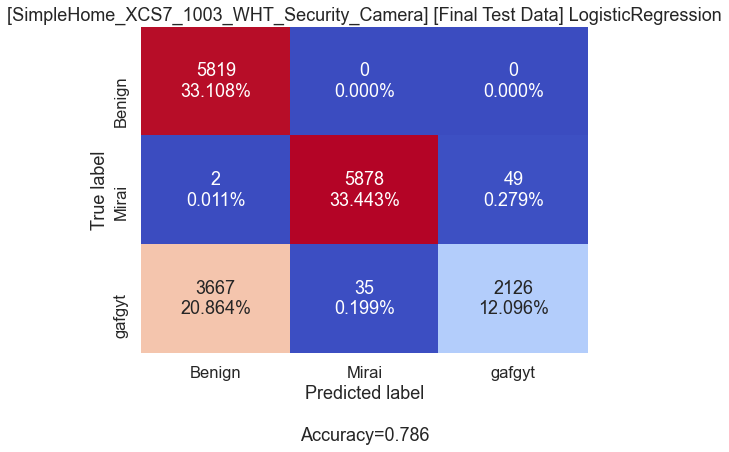

      Train:  Counter({0: 15739, 1: 9515, 2: 3451})
 Validation:  Counter({0: 6691, 1: 4085, 2: 1527})
       Test:  Counter({0: 9488, 1: 5913, 2: 2175})
      Label:  Counter({0: 9488, 1: 5913, 2: 2175})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999      9639
           1      0.999     0.999     0.999      9517
           2      0.999     0.998     0.998      9549

    accuracy                          0.999     28705
   macro avg      0.999     0.999     0.999     28705
weighted avg      0.999     0.999     0.999     28705



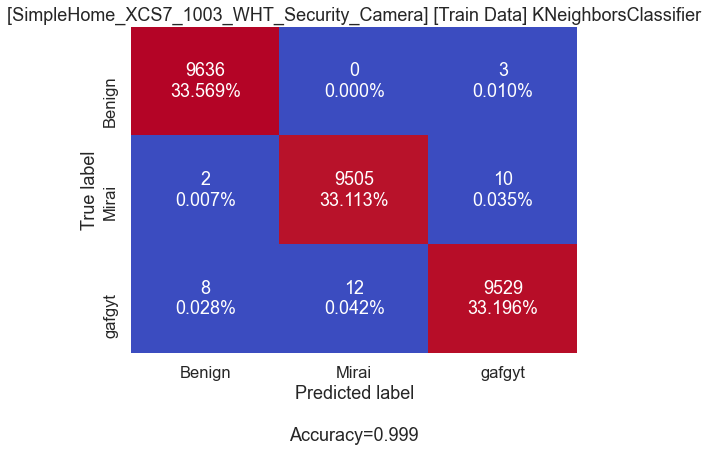


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      4070
           1      0.998     0.998     0.998      4082
           2      0.997     0.997     0.997      4151

    accuracy                          0.998     12303
   macro avg      0.998     0.998     0.998     12303
weighted avg      0.998     0.998     0.998     12303



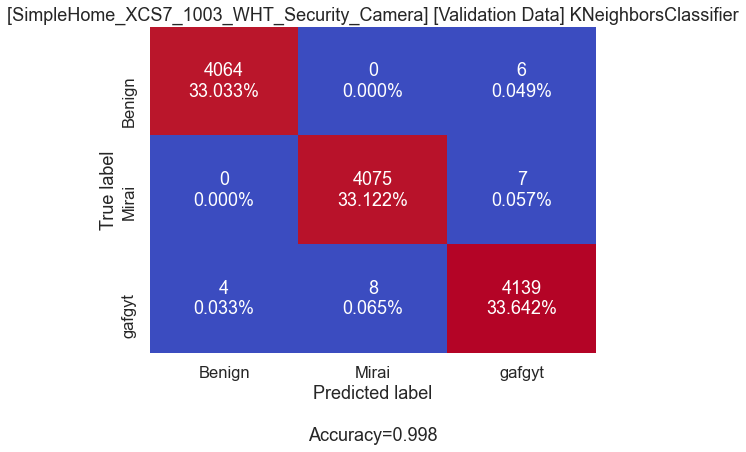


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.998     0.999      5819
           1      0.998     0.998     0.998      5929
           2      0.997     0.997     0.997      5828

    accuracy                          0.998     17576
   macro avg      0.998     0.998     0.998     17576
weighted avg      0.998     0.998     0.998     17576



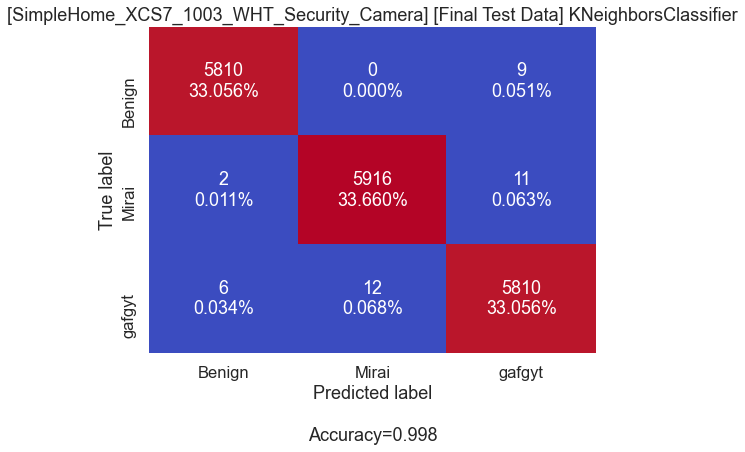

      Train:  Counter({0: 9646, 2: 9542, 1: 9517})
 Validation:  Counter({2: 4152, 1: 4083, 0: 4068})
       Test:  Counter({1: 5928, 2: 5830, 0: 5818})
      Label:  Counter({1: 5928, 2: 5830, 0: 5818})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      9639
           1      1.000     1.000     1.000      9517
           2      1.000     1.000     1.000      9549

    accuracy                          1.000     28705
   macro avg      1.000     1.000     1.000     28705
weighted avg      1.000     1.000     1.000     28705



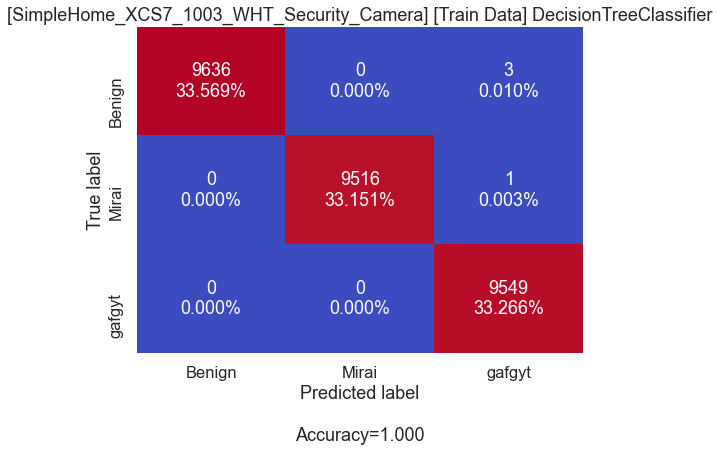


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      4070
           1      0.998     1.000     0.999      4082
           2      0.998     0.997     0.998      4151

    accuracy                          0.998     12303
   macro avg      0.998     0.998     0.998     12303
weighted avg      0.998     0.998     0.998     12303



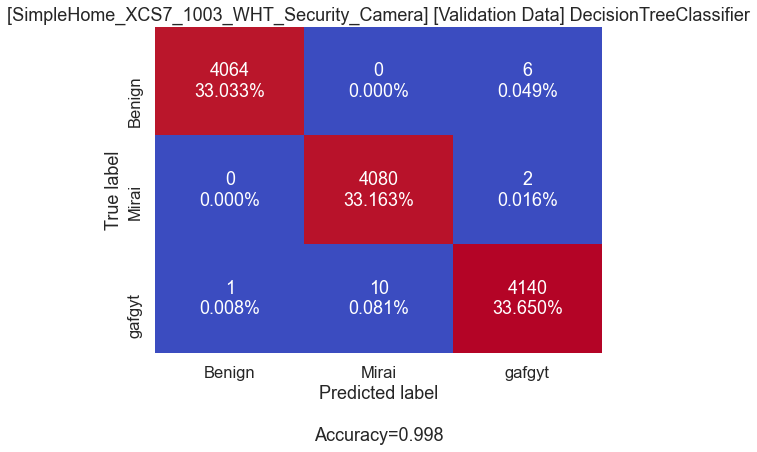


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.998     0.999      5819
           1      0.999     0.999     0.999      5929
           2      0.998     0.998     0.998      5828

    accuracy                          0.998     17576
   macro avg      0.998     0.998     0.998     17576
weighted avg      0.998     0.998     0.998     17576



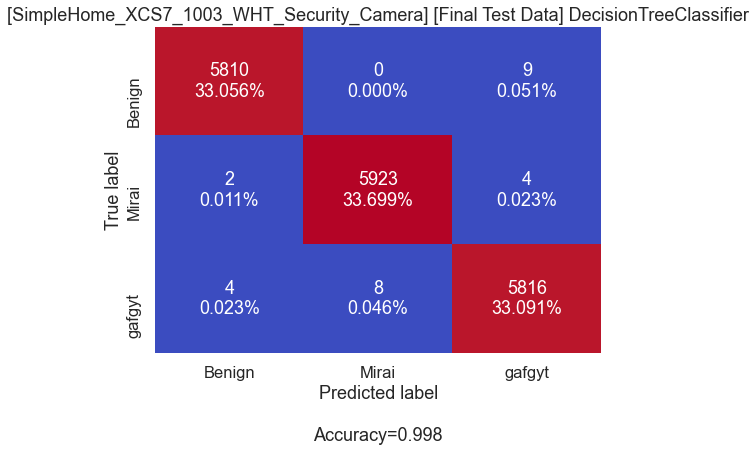

      Train:  Counter({0: 9636, 2: 9553, 1: 9516})
 Validation:  Counter({2: 4148, 1: 4090, 0: 4065})
       Test:  Counter({1: 5931, 2: 5829, 0: 5816})
      Label:  Counter({1: 5931, 2: 5829, 0: 5816})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      9639
           1      1.000     1.000     1.000      9517
           2      1.000     1.000     1.000      9549

    accuracy                          1.000     28705
   macro avg      1.000     1.000     1.000     28705
weighted avg      1.000     1.000     1.000     28705



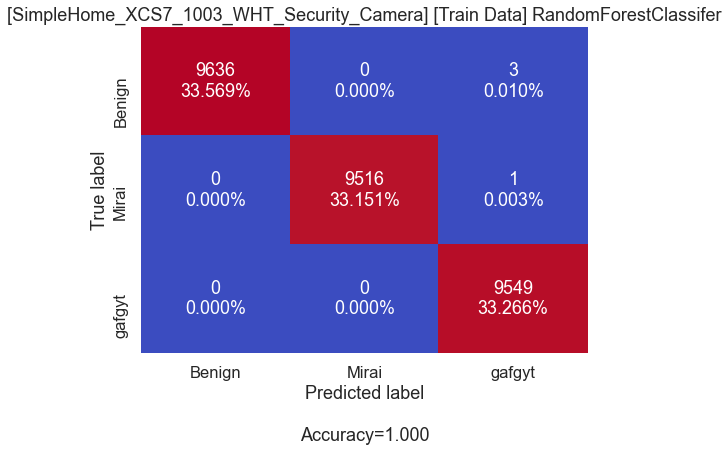


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      4070
           1      0.999     1.000     0.999      4082
           2      0.998     0.998     0.998      4151

    accuracy                          0.999     12303
   macro avg      0.999     0.999     0.999     12303
weighted avg      0.999     0.999     0.999     12303



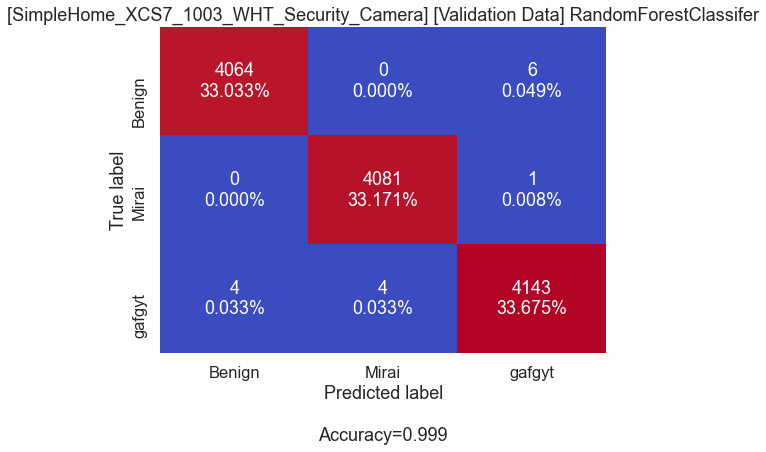


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     0.998     0.999      5819
           1      0.999     0.998     0.999      5929
           2      0.997     0.998     0.998      5828

    accuracy                          0.998     17576
   macro avg      0.998     0.998     0.998     17576
weighted avg      0.998     0.998     0.998     17576



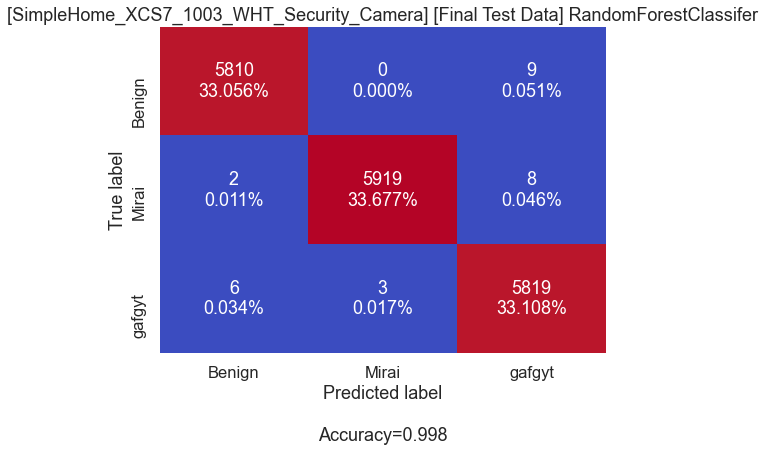

      Train:  Counter({0: 9636, 2: 9553, 1: 9516})
 Validation:  Counter({2: 4150, 1: 4085, 0: 4068})
       Test:  Counter({1: 5922, 2: 5836, 0: 5818})
      Label:  Counter({1: 5929, 2: 5828, 0: 5819})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      9639
           1      1.000     1.000     1.000      9517
           2      1.000     1.000     1.000      9549

    accuracy                          1.000     28705
   macro avg      1.000     1.000     1.000     28705
weighted avg      1.000     1.000     1.000     28705



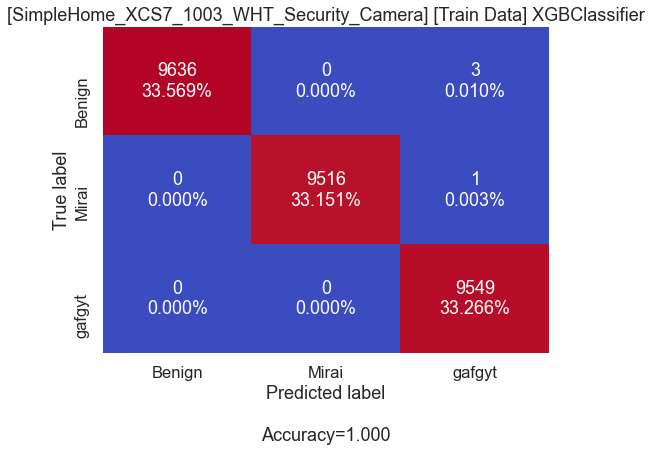


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      4070
           1      0.999     0.999     0.999      4082
           2      0.998     0.999     0.998      4151

    accuracy                          0.999     12303
   macro avg      0.999     0.999     0.999     12303
weighted avg      0.999     0.999     0.999     12303



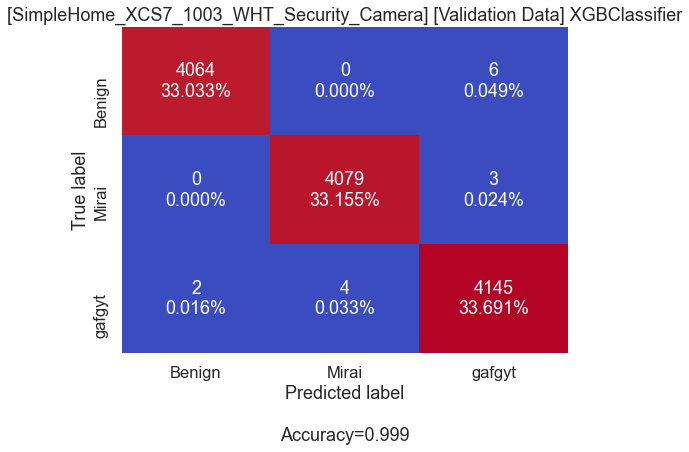


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.998     0.999      5819
           1      0.999     0.999     0.999      5929
           2      0.997     0.998     0.998      5828

    accuracy                          0.999     17576
   macro avg      0.999     0.999     0.999     17576
weighted avg      0.999     0.999     0.999     17576



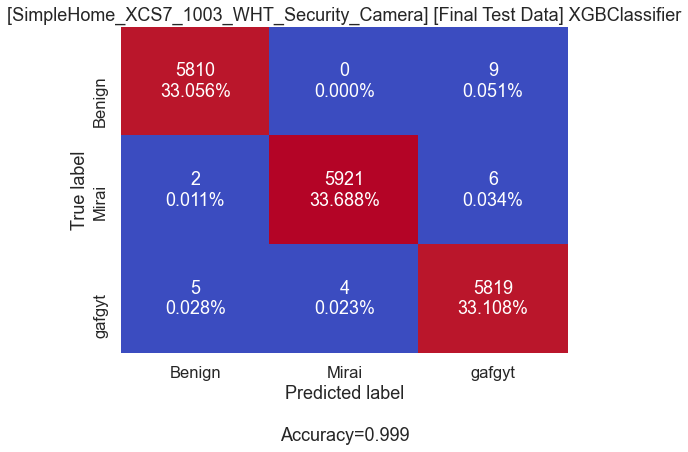

      Train:  Counter({0: 9636, 2: 9553, 1: 9516})
 Validation:  Counter({2: 4154, 1: 4083, 0: 4066})
       Test:  Counter({1: 5925, 2: 5834, 0: 5817})
      Label:  Counter({1: 5929, 2: 5828, 0: 5819})





In [27]:
# Read the pickle file or intantiate IoT_Device
XCS7_1003_iot = read_device_pickle(SIMPLEHOME_1003_SECURITY_CAMERA )    
if XCS7_1003_iot == None:
    # Instantiate class IoT_Device
    XCS7_1003_iot = IoT_Device(SIMPLEHOME_1003_SECURITY_CAMERA )
    
    #Pickle the object
    write_device_pickle(XCS7_1003_iot, SIMPLEHOME_1003_SECURITY_CAMERA)
model_factory(XCS7_1003_iot)

## Create a list of all IoT_Device instantiated class variables
> This list may be used in a loop to iterate through all devices

In [28]:
#list of all IoT_Devices intantiated class variable
iot_classObjs = [damini_iot, ennino_iot, ecobee_iot, B120N10_iot, SAMSUNG_iot, PT737E_iot, PT838_iot, XCS7_1002_iot, XCS7_1003_iot]

[Text(0.5, 0, '')]

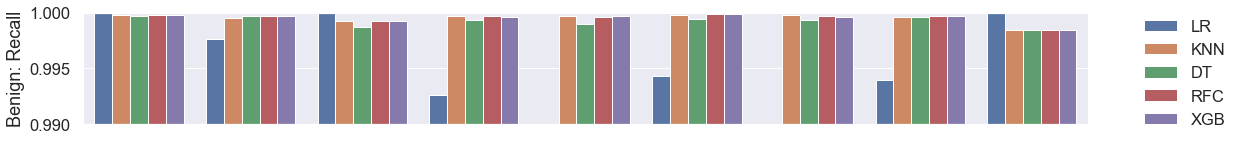

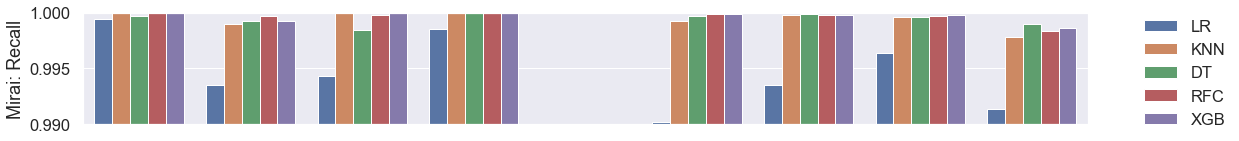

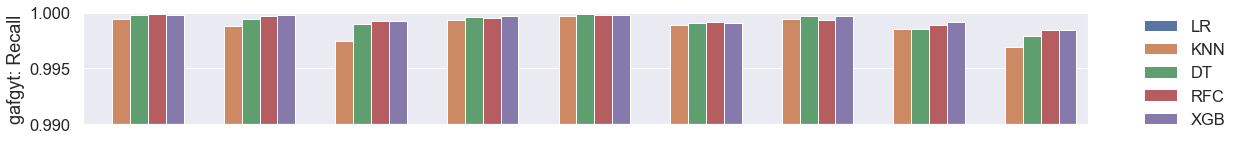

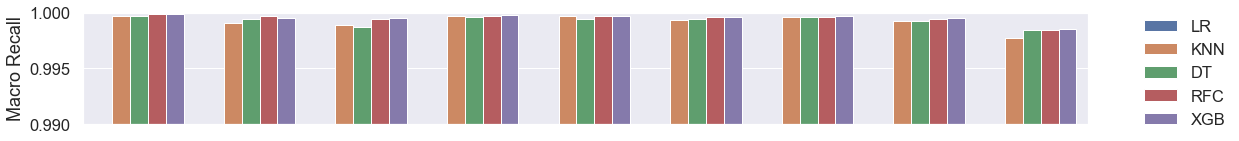

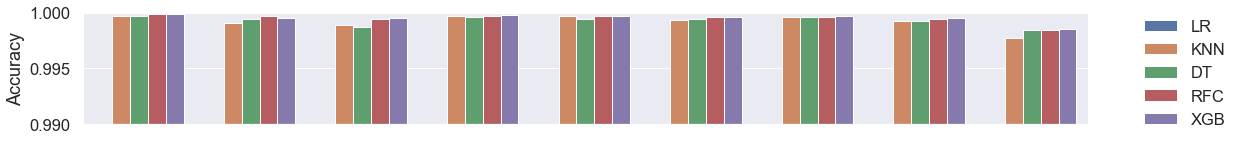

In [29]:
df = pd.DataFrame()
for item, device in enumerate(DEVICE_LST):
    iot = iot_classObjs[item]
    df = df.append(iot.lg_model_score, ignore_index=True)
    df = df.append(iot.knn_model_score, ignore_index=True)
    df = df.append(iot.dt_model_score, ignore_index=True)
    df =  df.append(iot.rfc_model_score, ignore_index=True)
    df = df.append(iot.xgb_model_score, ignore_index=True)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_0', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Benign: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_1', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Mirai: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_2
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_2', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'gafgyt: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Macro Recall
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Macro_Recall', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Macro Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Accuracy
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Accuracy', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Accuracy')
ss.set(xticklabels=[])
ss.set(xlabel=None)


[Text(0.5, 0, '')]

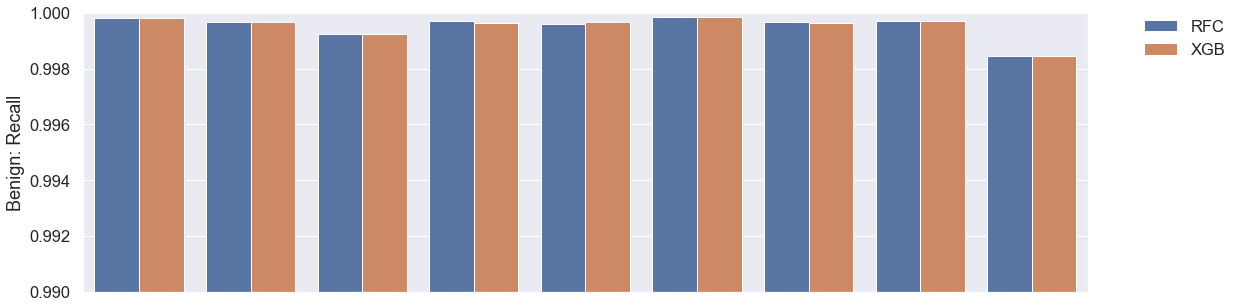

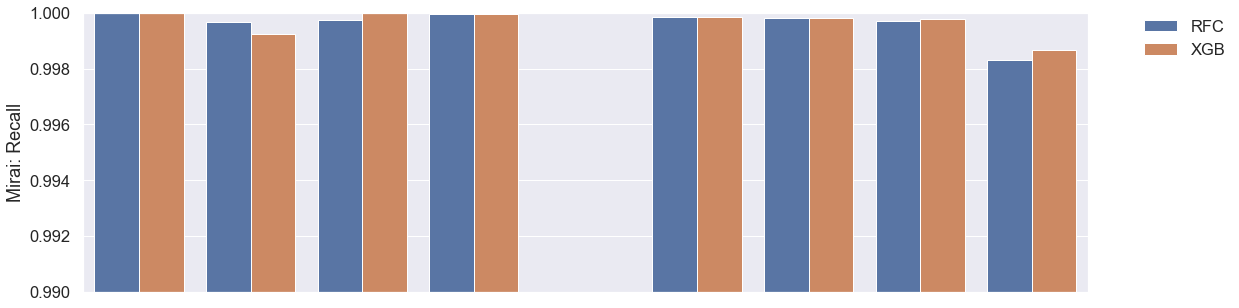

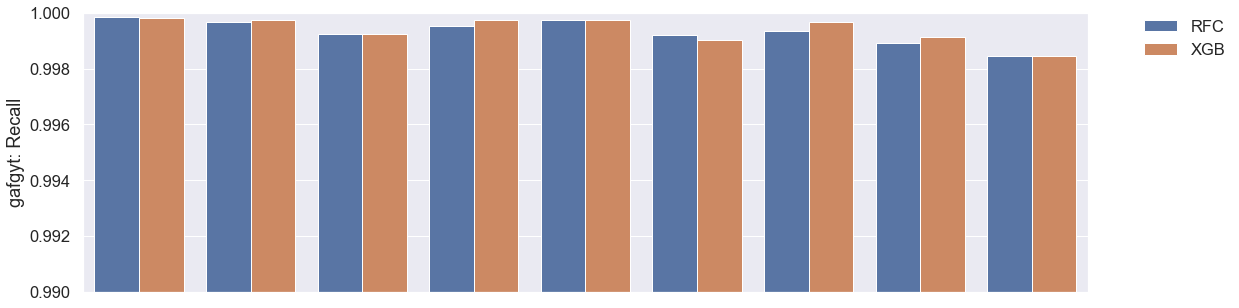

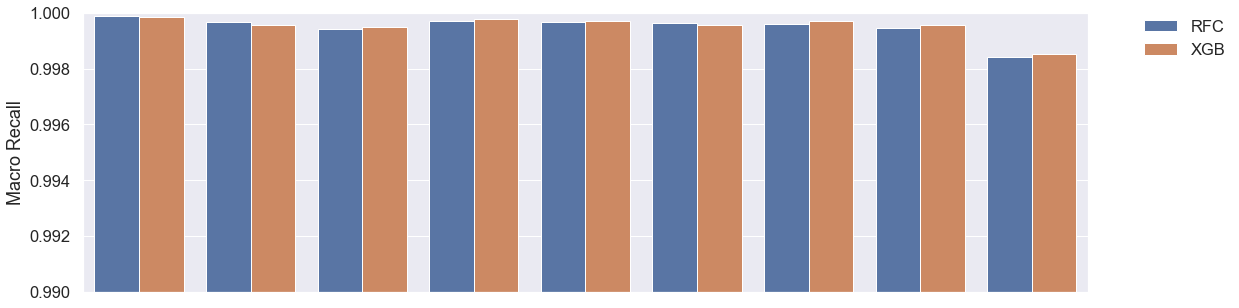

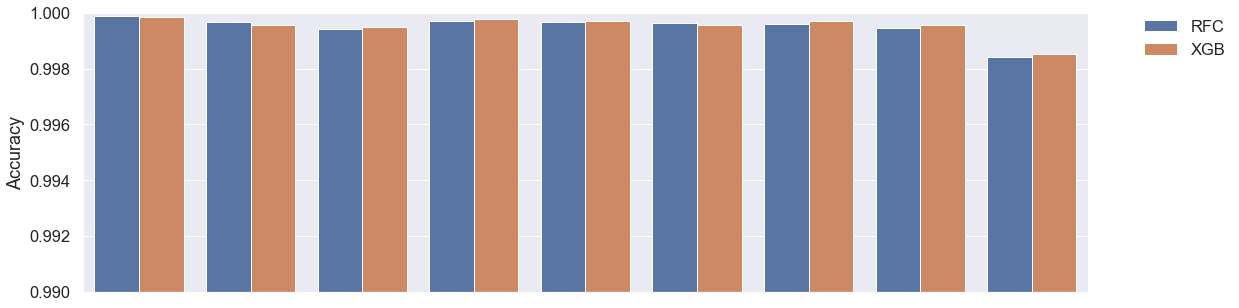

In [30]:
df = pd.DataFrame()
for item, device in enumerate(DEVICE_LST):
    iot = iot_classObjs[item]

    df =  df.append(iot.rfc_model_score, ignore_index=True)
    df = df.append(iot.xgb_model_score, ignore_index=True)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_0', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Benign: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_1', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Mirai: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_2
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_2', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'gafgyt: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Macro Recall
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Macro_Recall', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Macro Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Accuracy
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Accuracy', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Accuracy')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# * Best Model Evaluation * XGBoost *

> For each of the IoT device, do typeper parameter turning
  > "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] <BR>
  > "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],<BR>
  > "min_child_weight" : [ 1, 3, 5, 7 ],<BR>
  > "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],<BR>
  > "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]<BR>

## Call iot_xgboost_hyperparameter_tuning()  method in data_prep.py

In [36]:
iot_classObjs = [damini_iot, ennino_iot, ecobee_iot, B120N10_iot, SAMSUNG_iot, PT737E_iot, PT838_iot, XCS7_1002_iot, XCS7_1003_iot]
for iot in iot_classObjs:
    iot.iot_xgboost_hyperparameter_tuning('recall')
    iot.iot_xgboost_hyperparameter_tuning('accuracy')

inside
which_score recall
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.4min remaining:   46.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished



 Time taken: 0 hours 3 minutes and 8.31 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.7}
Score:  [0.99966364 0.99973091 0.99966364 0.99959637 0.99986545 0.99979817
 0.99986545 0.99966362 0.99966362 0.99979817]
\XGBoost - Mean of Macro Recall scores: 0.9997309024854838
inside
which_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.9min remaining:   35.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished



 Time taken: 0 hours 2 minutes and 28.54 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.3}
Score:  [0.99966364 0.99973091 0.99966364 0.99959637 0.99986545 0.99979817
 0.99986545 0.99966362 0.99966362 0.99979817]

XGBoost - Mean of Accuracy scores:  0.9997309024854838
inside
which_sc

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.1min remaining:   39.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.3min finished



 Time taken: 0 hours 2 minutes and 27.62 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.4}
Score:  [0.99940324 0.99948849 0.99974425 0.99931799 0.99974425 0.99957374
 0.99965899 0.99948849 0.9998295  0.99940324]
\XGBoost - Mean of Macro Recall scores: 0.9995652173913042
inside
which

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.7min remaining:   32.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished



 Time taken: 0 hours 2 minutes and 7.48 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.5}
Score:  [0.99940324 0.99948849 0.99974425 0.99931799 0.99974425 0.99957374
 0.99965899 0.99948849 0.9998295  0.99940324]

XGBoost - Mean of Accuracy scores:  0.9995652173913042
inside
which_sco

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   41.9s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   47.6s finished



 Time taken: 0 hours 0 minutes and 49.67 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.3}
Score:  [1.         0.99872903 0.99974581 0.99974581 0.99974581 0.99847483
 0.99923742 0.99872903 1.         1.        ]
\XGBoost - Mean of Macro Recall scores: 0.9994407727503812
inside
which

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   35.9s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   42.7s finished



 Time taken: 0 hours 0 minutes and 45.2 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.5}
Score:  [1.         0.99872903 0.99974581 0.99974581 0.99974581 0.99847483
 0.99923742 0.99872903 1.         1.        ]

XGBoost - Mean of Accuracy scores:  0.9994407727503812
inside
which_s

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 12.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.3min finished



 Time taken: 0 hours 15 minutes and 57.28 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.5}
Score:  [0.99994294 0.99980978 0.99979076 0.99979076 0.99984783 0.99992391
 0.99975272 0.99994294 0.99977174 0.99977174]
\XGBoost - Mean of Macro Recall scores: 0.9998345126683403
inside
wh

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  9.2min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 10.4min finished



 Time taken: 0 hours 10 minutes and 54.58 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.5}
Score:  [0.99994294 0.99980978 0.99979076 0.99979076 0.99984783 0.99992391
 0.99975272 0.99994294 0.99977174 0.99977174]

XGBoost - Mean of Accuracy scores:  0.9998345126683403
inside
which_s

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   32.3s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   36.6s finished



 Time taken: 0 hours 0 minutes and 38.26 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.3}
Score:  [0.99932886 0.99952061 0.9991371  0.99980825 0.99961649 0.99980825
 0.99942474 1.         0.99961649 0.99952061]
\XGBoost - Mean of Macro Recall scores: 0.9995781399808246
inside
which_score accuracy
Fitting 5 folds for each of

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   25.9s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   33.9s finished



 Time taken: 0 hours 0 minutes and 35.98 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4}
Score:  [0.99932886 0.99952061 0.9991371  0.99980825 0.99961649 0.99980825
 0.99942474 1.         0.99961649 0.99952061]

XGBoost - Mean of Accuracy scores:  0.9995781399808246
inside
which_score recall
Fitting 5 folds for each of 5 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  3.0min remaining:   56.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.3min finished



 Time taken: 0 hours 3 minutes and 29.38 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.4}
Score:  [0.99951735 0.99978549 0.99973185 0.99978548 0.99957095 0.99983911
 0.99973185 0.99957095 0.99983911 0.99973185]
\XGBoost - Mean of Macro Recall scores: 0.9997103973890542
inside
whi

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  4.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.4min finished



 Time taken: 0 hours 5 minutes and 39.24 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
Score:  [0.99951735 0.99978549 0.99973185 0.99978548 0.99957095 0.99983911
 0.99973185 0.99957095 0.99983911 0.99973185]

XGBoost - Mean of Accuracy scores:  0.9997103973890542
inside
which_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  4.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.1min finished



 Time taken: 0 hours 5 minutes and 24.05 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.4}
Score:  [0.99983082 0.99983082 0.99986465 0.9996278  0.99986465 0.99976315
 0.99983082 0.99976315 0.99976315 0.99989849]
\XGBoost - Mean of Macro Recall scores: 0.9998037502143609
inside
which

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  5.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.3min finished



 Time taken: 0 hours 6 minutes and 32.51 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.4}
Score:  [0.99983082 0.99983082 0.99986465 0.9996278  0.99986465 0.99976315
 0.99983082 0.99976315 0.99976315 0.99989849]

XGBoost - Mean of Accuracy scores:  0.9998037502143609
inside
which_sc

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.4min remaining:   45.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min finished



 Time taken: 0 hours 2 minutes and 51.8 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.7}
Score:  [0.99957069 0.9997138  0.9998569  0.99992845 0.99957069 0.99957066
 0.99957066 0.99978533 0.99957066 0.99928444]
\XGBoost - Mean of Macro Recall scores: 0.9996422279747648
inside
whic

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.7min remaining:   50.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.2min finished



 Time taken: 0 hours 3 minutes and 20.06 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.4, 'colsample_bytree': 0.4}
Score:  [0.99957069 0.9997138  0.9998569  0.99992845 0.99957069 0.99957066
 0.99957066 0.99978533 0.99957066 0.99928444]

XGBoost - Mean of Accuracy scores:  0.9996422279747648
inside
whic

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   57.5s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished



 Time taken: 0 hours 1 minutes and 17.42 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.4}
Score:  [0.9984639  0.99914661 0.99914661 0.99914661 0.99931717 0.99897576
 0.99863435 0.99863435 0.99897576 0.99948788]
\XGBoost - Mean of Macro Recall scores: 0.9989929002434648
inside
whi

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   48.0s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.0min finished



 Time taken: 0 hours 1 minutes and 3.59 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.4}
Score:  [0.9984639  0.99914661 0.99914661 0.99914661 0.99931717 0.99897576
 0.99863435 0.99863435 0.99897576 0.99948788]

XGBoost - Mean of Accuracy scores:  0.9989929002434648


In [35]:
'''
Method Name: iot_xgboost_hyperparameter_tuning
    Input: self
    Returns: None
    Because I have a large dataset, let me put some timer while running parameter turning
    Loop through each of the 9 IoT devices to score on Recall.
'''
for iot in iot_classObjs:
    # Instantiate XGBClassifer()
    xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.25, max_delta_step=0, max_depth=8,
                  min_child_weight=1,  monotone_constraints='()',
                  n_estimators=100, n_jobs=0, num_parallel_tree=1,
                  objective='multi:softprob', random_state=0, reg_alpha=0,
                  reg_lambda=1, scale_pos_weight=None, subsample=1,
                  tree_method='exact', validate_parameters=1, verbosity=None, score="")
    # random_search = RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='recall_macro',  n_jobs=-1,cv=5,verbose=3)

    score = cross_val_score(xgb, iot.X,iot.y,cv=10)
print("Score: ", score)

# if which_score == 'recall':
#     print("\XGBoost - Mean of Macro Recall scores:",score.mean())
# else:
#     print("\nXGBoost - Mean of Accuracy scores: ", score.mean())

[07:07:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { score } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:07:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { score } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:07:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { score } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/Users/lalithap/anaconda3/envs

[07:17:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { score } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:17:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { score } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:17:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { score } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

## Run randomforest_hypterparameter_tuning

In [33]:
iot_classObjs = [damini_iot, ennino_iot, ecobee_iot, B120N10_iot, SAMSUNG_iot, PT737E_iot, PT838_iot, XCS7_1002_iot, XCS7_1003_iot]
for iot in iot_classObjs:
    iot.iot_randomforest_hyperparameter_tuning('recall')
    iot.iot_randomforest_hyperparameter_tuning('accuracy')    

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  7.2min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.1min finished



 Time taken: 0 hours 8 minutes and 48.2 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99959637 0.99986546 0.99966364 0.99966364 0.99986545 0.99979817
 0.99979817 0.99959634 0.99986545 0.99973089]

RF: Mean of Recall scores: 0.9997443569086254
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  6.6min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.6min finished



 Time taken: 0 hours 9 minutes and 16.15 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=900, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 900, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99959637 0.99986546 0.99966364 0.99966364 0.99986545 0.99979817
 0.99979817 0.99959634 0.99986545 0.99973089]

RF: Mean of Recall scores: 0.9997443569086254
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.6min remaining:   49.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.2min finished



 Time taken: 0 hours 3 minutes and 21.01 seconds.

best_estimator_:  RandomForestClassifier(max_features='sqrt', n_estimators=300, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99948849 0.99957374 0.99974425 0.99940324 0.99957374 0.99948849
 0.99965899 0.99931799 0.9998295  0.99923274]

RF: Mean of Recall scores: 0.999531116794544
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  5.2min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.5min finished



 Time taken: 0 hours 6 minutes and 51.6 seconds.

best_estimator_:  RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 700, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99948849 0.99957374 0.99974425 0.99940324 0.99957374 0.99948849
 0.99965899 0.99931799 0.9998295  0.99923274]

RF: Mean of Recall scores: 0.999531116794544
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.4min remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished



 Time taken: 0 hours 1 minutes and 34.06 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=700,
                       n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 700, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
RF: Score:  [0.99974581 0.99872903 0.99974581 0.99974581 0.99974581 0.99872903
 0.99949161 0.99923742 1.         1.        ]

RF: Mean of Recall scores: 0.999517031011693
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.2min remaining:   23.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished



 Time taken: 0 hours 1 minutes and 23.75 seconds.

best_estimator_:  RandomForestClassifier(max_features='sqrt', n_estimators=500, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99974581 0.99872903 0.99974581 0.99974581 0.99974581 0.99872903
 0.99949161 0.99923742 1.         1.        ]

RF: Mean of Recall scores: 0.999517031011693
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 84.6min remaining: 26.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 90.8min finished



 Time taken: 1 hours 36 minutes and 27.28 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=700, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99986685 0.99977174 0.99967663 0.99984783 0.99975272 0.99986685
 0.99967663 0.99986685 0.9997337  0.99977174]

RF: Mean of Recall scores: 0.9997831545309289
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 210.9min remaining: 66.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 212.7min finished



 Time taken: 3 hours 36 minutes and 23.31 seconds.

best_estimator_:  RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99986685 0.99977174 0.99967663 0.99984783 0.99975272 0.99986685
 0.99967663 0.99986685 0.9997337  0.99977174]

RF: Mean of Recall scores: 0.9997831545309289
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  3.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min finished



 Time taken: 0 hours 4 minutes and 8.29 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99942474 0.99952061 0.99952061 0.99980825 0.99971237 0.99980825
 0.99942474 1.         0.99971237 0.99952061]

RF: Mean of Recall scores: 0.9996452540747841
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.5min remaining:   47.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished



 Time taken: 0 hours 3 minutes and 11.12 seconds.

best_estimator_:  RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=500,
                       n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
RF: Score:  [0.99942474 0.99952061 0.99952061 0.99980825 0.99971237 0.99980825
 0.99942474 1.         0.99971237 0.99952061]

RF: Mean of Recall scores: 0.9996452540747841
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 11.5min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.7min finished



 Time taken: 0 hours 14 minutes and 10.89 seconds.

best_estimator_:  RandomForestClassifier(max_features='sqrt', n_estimators=500, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.9996246  0.9996246  0.99967822 0.99957095 0.99957095 0.99994637
 0.99973185 0.99946369 0.99962458 0.99978548]

RF: Mean of Recall scores: 0.9996621299516841
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 10.4min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 11.7min finished



 Time taken: 0 hours 11 minutes and 45.76 seconds.

best_estimator_:  RandomForestClassifier(n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 100, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.9996246  0.9996246  0.99967822 0.99957095 0.99957095 0.99994637
 0.99973185 0.99946369 0.99962458 0.99978548]

RF: Mean of Recall scores: 0.9996621299516841
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 10.7min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 11.5min finished



 Time taken: 0 hours 11 minutes and 42.62 seconds.

best_estimator_:  RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
RF: Score:  [0.99969548 0.99972932 0.99959396 0.9996278  0.99969547 0.99983082
 0.9996278  0.99969547 0.99969547 0.99966164]

RF: Mean of Recall scores: 0.9996853237301171
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 17.5min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 19.2min finished



 Time taken: 0 hours 20 minutes and 44.46 seconds.

best_estimator_:  RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99969548 0.99972932 0.99959396 0.9996278  0.99969547 0.99983082
 0.9996278  0.99969547 0.99969547 0.99966164]

RF: Mean of Recall scores: 0.9996853237301171
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  5.6min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.0min finished



 Time taken: 0 hours 6 minutes and 25.8 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99957069 0.9997138  0.99957069 0.99992845 0.99949914 0.99964222
 0.99935599 0.99964222 0.99942755 0.99928444]

RF: Mean of Recall scores: 0.9995635185490486
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  6.0min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.1min finished



 Time taken: 0 hours 6 minutes and 31.87 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=500, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99957069 0.9997138  0.99957069 0.99992845 0.99949914 0.99964222
 0.99935599 0.99964222 0.99942755 0.99928444]

RF: Mean of Recall scores: 0.9995635185490486
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.7min remaining:   32.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished



 Time taken: 0 hours 1 minutes and 46.73 seconds.

best_estimator_:  RandomForestClassifier(max_depth=5, max_features='sqrt', n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}
RF: Score:  [0.99863458 0.99880526 0.99914661 0.99914661 0.99931717 0.99897576
 0.99846364 0.99863435 0.99863435 0.99965859]

RF: Mean of Recall scores: 0.9989416911392924
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.0min remaining:   37.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished



 Time taken: 0 hours 2 minutes and 10.54 seconds.

best_estimator_:  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99863458 0.99880526 0.99914661 0.99914661 0.99931717 0.99897576
 0.99846364 0.99863435 0.99863435 0.99965859]

RF: Mean of Recall scores: 0.9989416911392924


In [ ]:
## Hyper Parameter Optimization Selection
params={
 "n_estimators": [100,300,500,700, 900, 1000],
 "criterion": ["gini", "entropy"],
 "max_depth": [ 3,  5,  10, None], 
 "max_features": ["auto", "sqrt"]}
# "min_sample_split": [2, 4, 6] }


# Instantiate XGBClassifer()
rfc= RandomForestClassifier( n_jobs=-1, oob_score = False, random_state=42)
random_search = RandomizedSearchCV(rfc,param_distributions=params,n_iter=5,scoring='recall_macro', n_jobs=-1,cv=5,verbose=3)

# Start the timer and for fit 
start_time = timer(None) 
random_search.fit(damini_iot.X,damini_iot.y)

# End the timer
timer(start_time) 

print("\nbest_estimator_: ", random_search.best_estimator_)
print("\nbest_params_: ", random_search.best_params_)

score=cross_val_score(xgb,damini_iot.X,damini_iot.y,cv=10)
print("RF: Score: ", score)
print("\nRF: Mean of Recall scores:",score.mean())
#iot.rfc_hp = score.mean()

